# Importing Data Set

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
from math import ceil
from os.path import join
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
sns.set()
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'missingno'

In [2]:
pip install missingno 


  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [2]:
data = pd.read_csv('XYZ_sports_dataset.csv', sep=';')

In [3]:
len_original_data = len(data)

In [3]:
data

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,...,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0
14938,24938,39,Male,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,...,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1
14939,24939,20,Male,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,...,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1
14940,24940,55,Male,4800.0,2018-03-01,2018-03-01,2019-07-01,2019-12-31,2019-10-28,3,...,0.0,185.0,155,3.0,15.87,7,2,0.0,0,0


In [5]:
data.duplicated().sum()

0

In [6]:
data.set_index('ID',inplace=True)

In [7]:
metric_features= data.select_dtypes(include=np.number).columns
metric_features

Index(['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')

In [8]:
len(data)

14942

# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 10000 to 24941
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14942 non-null  int64  
 1   Gender                      14942 non-null  object 
 2   Income                      14447 non-null  float64
 3   EnrollmentStart             14942 non-null  object 
 4   EnrollmentFinish            14942 non-null  object 
 5   LastPeriodStart             14942 non-null  object 
 6   LastPeriodFinish            14942 non-null  object 
 7   DateLastVisit               14942 non-null  object 
 8   DaysWithoutFrequency        14942 non-null  int64  
 9   LifetimeValue               14942 non-null  float64
 10  UseByTime                   14942 non-null  int64  
 11  AthleticsActivities         14906 non-null  float64
 12  WaterActivities             14905 non-null  float64
 13  FitnessActivities           1490

In [10]:
data.describe()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14942.000000,14447.000000,14942.000000,14942.000000,14942.000000,14906.00000,14905.000000,14907.000000,14906.0,14907.000000,...,14907.000000,14916.000000,14942.000000,14407.000000,14942.000000,14942.000000,14942.000000,14930.000000,14942.000000,14942.000000
mean,26.015794,2230.816086,81.224936,302.561871,0.047116,0.00738,0.296209,0.576038,0.0,0.055544,...,0.001878,40.120542,10.152456,5.759561,41.636299,5.320707,1.205260,0.019893,0.022286,0.800964
std,14.156582,1566.527734,144.199576,364.319566,0.211893,0.08559,0.456600,0.494201,0.0,0.229047,...,0.043300,65.466459,29.154202,2.118867,21.066166,6.332958,1.381305,0.139637,0.166777,0.399289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1470.000000,13.000000,83.600000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,7.000000,0.000000,4.000000,25.720000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,23.000000,1990.000000,41.000000,166.200000,0.000000,0.00000,0.000000,1.000000,0.0,0.000000,...,0.000000,18.000000,0.000000,7.000000,38.990000,4.000000,1.000000,0.000000,0.000000,1.000000
75%,31.000000,2790.000000,83.750000,355.075000,0.000000,0.00000,1.000000,1.000000,0.0,0.000000,...,0.000000,45.000000,3.000000,7.000000,60.970000,7.000000,2.000000,0.000000,0.000000,1.000000
max,87.000000,10890.000000,1745.000000,6727.800000,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,...,1.000000,1031.000000,581.000000,7.000000,240.030000,84.000000,6.000000,1.000000,3.000000,1.000000


In [11]:
data.dtypes

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRene

In [12]:
date_columns = ['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']

data[date_columns] = data[date_columns].apply(pd.to_datetime)
data.dtypes

Age                                    int64
Gender                                object
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                              int64
AthleticsActivities                  float64
WaterActivities                      float64
FitnessActivities                    float64
DanceActivities                      float64
TeamActivities                       float64
RacketActivities                     float64
CombatActivities                     float64
NatureActivities                     float64
SpecialActivities                    float64
OtherActivities                      float64
NumberOfFrequencies                  float64
AttendedCl

In [13]:
data.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

<Axes: >

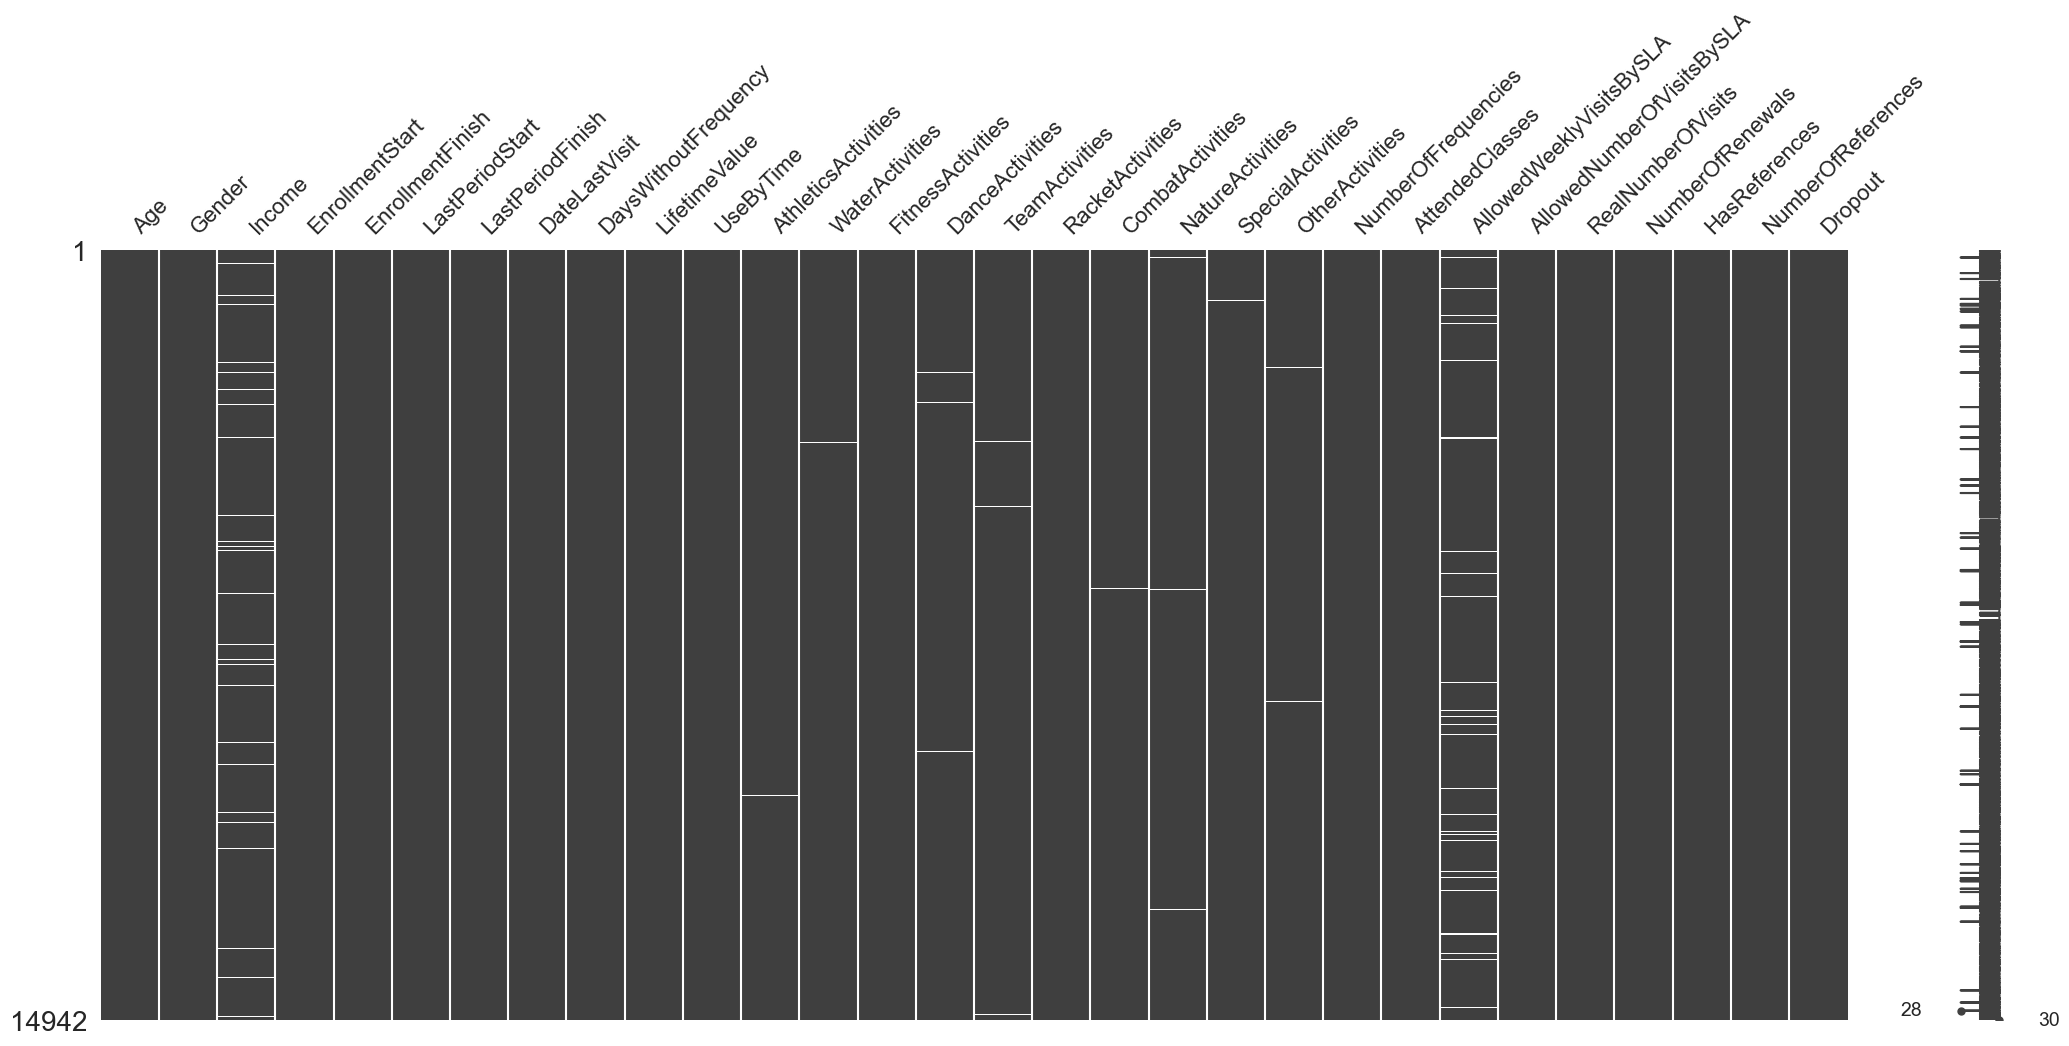

In [14]:
msno.matrix(data)

# Dealing with missing data

In [15]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data['Income'] = imputer.fit_transform(data['Income'].values.reshape(-1, 1))

In [16]:
data['HasReferences'].fillna('False', inplace=True)
data['AllowedWeeklyVisitsBySLA'].fillna('0', inplace=True)

In [17]:
#dropping missing values that repesente less than 5% of the data 
threshold= len(data)*0.05
cols_to_drop = data.columns[data.isna().sum() <= threshold]
data.dropna(subset=cols_to_drop, inplace= True)
len(data)

14541

<Axes: >

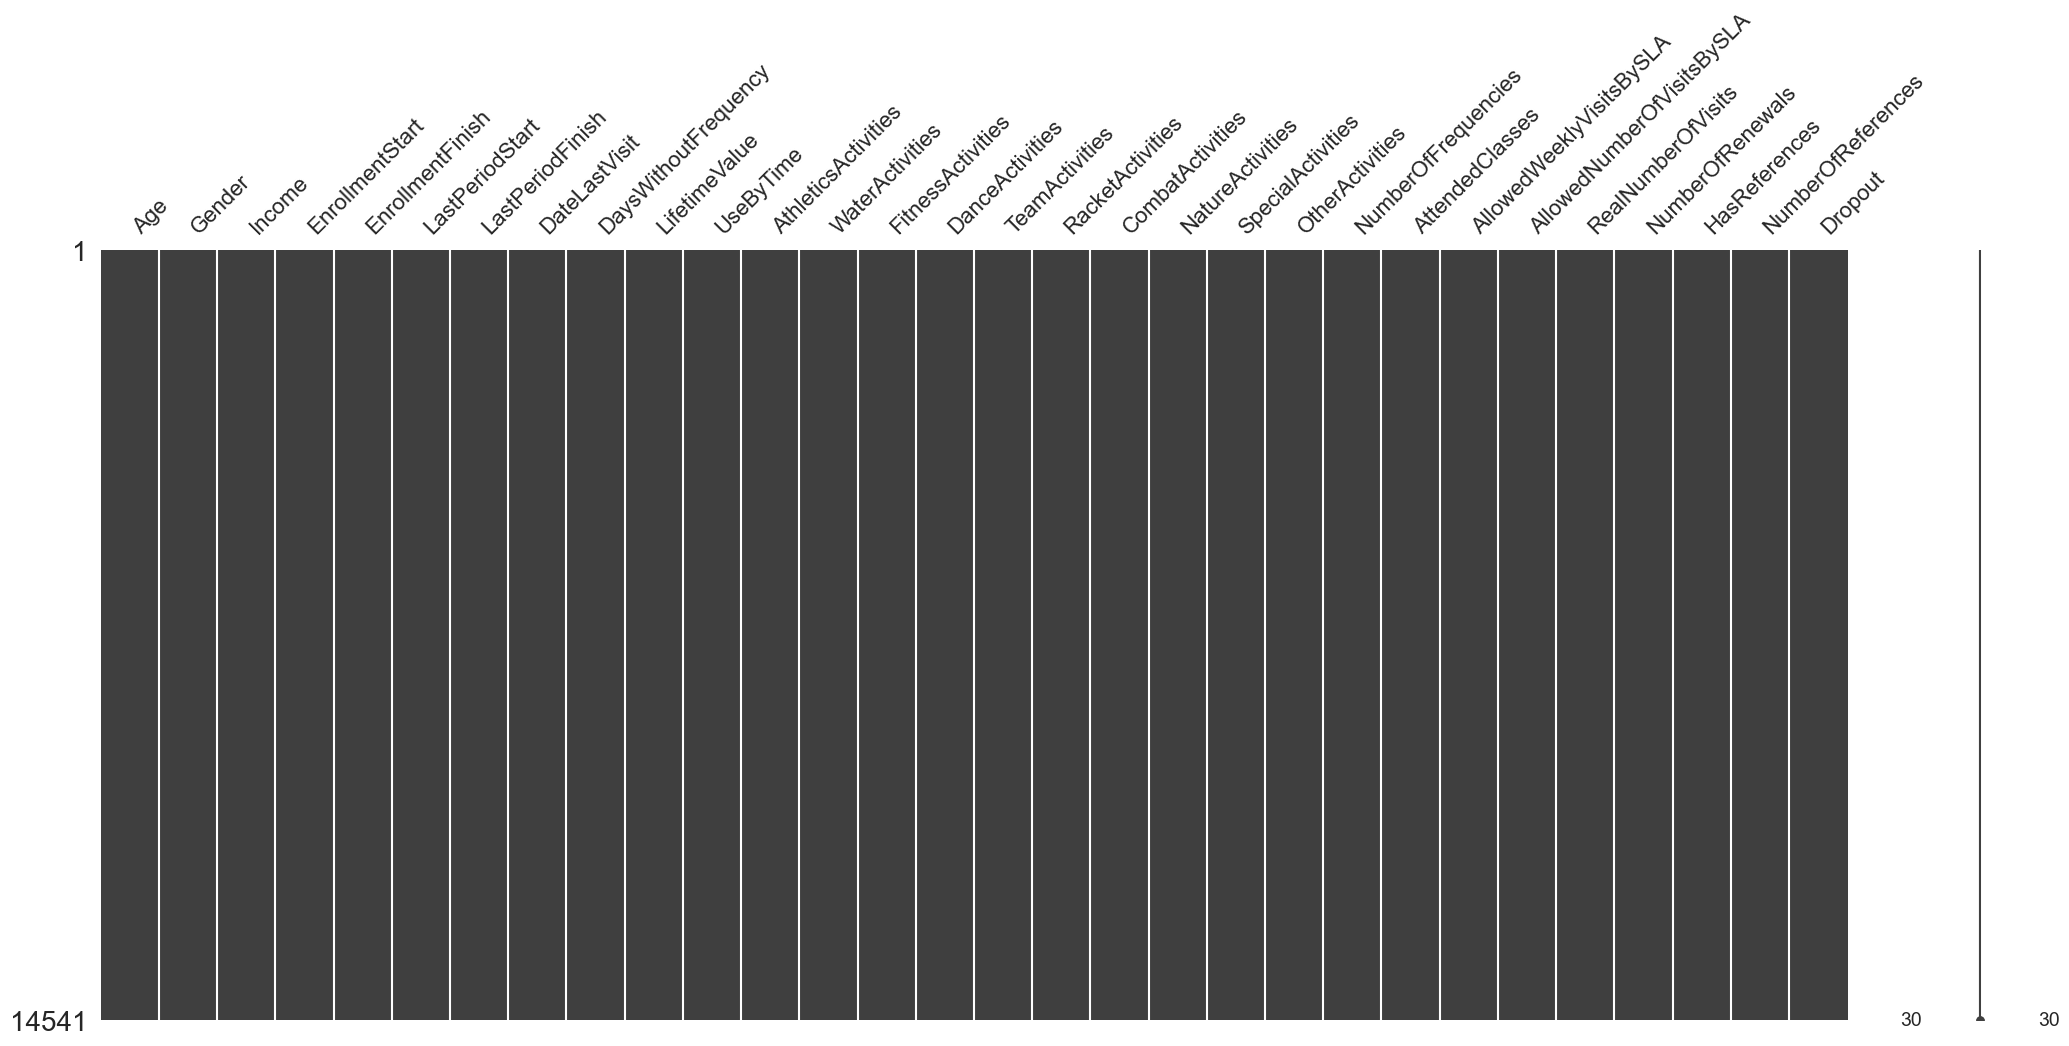

In [18]:
msno.matrix(data)

In [19]:
nr_of_rows = (len(data) / len_original_data) * 100
print('We kept', round(nr_of_rows, 2), '% of our data set.')

We kept 97.32 % of our data set.


In [20]:
data.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

In [21]:
data.dtypes

Age                                    int64
Gender                                object
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                              int64
AthleticsActivities                  float64
WaterActivities                      float64
FitnessActivities                    float64
DanceActivities                      float64
TeamActivities                       float64
RacketActivities                     float64
CombatActivities                     float64
NatureActivities                     float64
SpecialActivities                    float64
OtherActivities                      float64
NumberOfFrequencies                  float64
AttendedCl

In [22]:
data['Gender_binary'] = np.where(data['Gender']== 'Male',0,1)
# Male = 0 | Female = 1
data.drop('Gender',axis=1, inplace=True)
data

,Age,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,Gender_binary
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,5500.000000,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,...,9.0,7,0,6.28,2,0,0.0,0,0,1
10001,29,2630.000000,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,...,23.0,1,2.0,17.42,1,2,0.0,0,1,1
10002,23,1980.000000,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,...,6.0,0,7.0,30.03,6,0,0.0,0,1,0
10003,9,0.000000,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,...,20.0,2,2.0,17.72,3,0,0.0,0,1,0
10005,24,2220.000000,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,0,...,28.0,0,7.0,59.01,26,0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,14,0.000000,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,1460.45,0,...,112.0,96,4.0,34.84,8,3,0.0,0,0,0
24938,39,2230.816086,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,343.85,0,...,57.0,0,7.0,60.97,3,0,0.0,0,1,0
24939,20,1810.000000,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,43.60,0,...,6.0,0,7.0,30.03,8,0,0.0,0,1,0


In [23]:
data.dtypes

Age                                    int64
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                              int64
AthleticsActivities                  float64
WaterActivities                      float64
FitnessActivities                    float64
DanceActivities                      float64
TeamActivities                       float64
RacketActivities                     float64
CombatActivities                     float64
NatureActivities                     float64
SpecialActivities                    float64
OtherActivities                      float64
NumberOfFrequencies                  float64
AttendedClasses                        int64
AllowedWee

In [24]:
data['HasReferences'].unique()
data['HasReferences'].value_counts()

HasReferences
0.0      14238
1.0        292
False       11
Name: count, dtype: int64

In [25]:
data['HasReferences'] = np.where(data['HasReferences'] == 1.0, 1, 0)
data['AllowedWeeklyVisitsBySLA'] = data['AllowedWeeklyVisitsBySLA'].astype('int')

In [26]:
data.describe()

,Age,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,Gender_binary
count,14541.000000,14541.000000,14541,14541,14541,14541,14541,14541.000000,14541.000000,14541.000000,...,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000
mean,26.000138,2229.226388,2016-11-10 18:18:14.780276224,2017-09-01 20:24:18.716732160,2017-06-30 11:53:24.868990976,2018-03-06 08:05:26.800082688,2017-10-23 19:27:22.170414848,81.393714,302.175628,0.047246,...,39.991197,10.164913,5.554570,41.597918,5.320198,1.203012,0.020081,0.022351,0.801183,0.598515
min,0.000000,0.000000,2014-06-02 00:00:00,2014-06-02 00:00:00,2014-01-01 00:00:00,2014-12-31 00:00:00,2014-07-03 00:00:00,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1490.000000,2015-08-10 00:00:00,2016-06-04 00:00:00,2016-01-01 00:00:00,2016-12-31 00:00:00,2016-05-25 00:00:00,13.000000,83.600000,0.000000,...,7.000000,0.000000,4.000000,25.720000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,23.000000,2030.000000,2016-09-23 00:00:00,2017-08-29 00:00:00,2018-01-01 00:00:00,2018-06-30 00:00:00,2018-01-15 00:00:00,41.000000,166.200000,0.000000,...,18.000000,0.000000,7.000000,38.990000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,31.000000,2740.000000,2018-03-06 00:00:00,2018-12-11 00:00:00,2019-01-01 00:00:00,2019-06-30 00:00:00,2019-05-30 00:00:00,84.000000,354.600000,0.000000,...,45.000000,3.000000,7.000000,60.970000,7.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,87.000000,10890.000000,2019-10-21 00:00:00,2019-10-31 00:00:00,2019-07-01 00:00:00,2019-12-31 00:00:00,2019-10-31 00:00:00,1745.000000,6727.800000,1.000000,...,1031.000000,581.000000,7.000000,240.030000,84.000000,6.000000,1.000000,3.000000,1.000000,1.000000
std,14.145598,1540.094850,NaN,NaN,NaN,NaN,NaN,144.616910,363.955859,0.212171,...,64.849575,29.253296,2.337629,21.030509,6.341351,1.380417,0.140283,0.166222,0.399124,0.490216


In [27]:
data.columns

Index(['Age', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout', 'Gender_binary'],
      dtype='object')

In [28]:
new_column_names = {'AthleticsActivities': 'Athletics', 
                    'WaterActivities': 'Water',
                    'FitnessActivities': 'Fitness',
                    'DanceActivities': 'Dance',
                    'TeamActivities': 'Team',
                    'RacketActivities': 'Racket',
                    'CombatActivities': 'Combat',
                    'NatureActivities': 'Nature',
                    'SpecialActivities': 'Special',
                    'OtherActivities': 'Other',
                    'AllowedWeeklyVisitsBySLA': 'AllowedWeeklyVisits',
                    'AllowedNumberOfVisitsBySLA': 'AllowedNVisits',
                    'RealNumberOfVisits': 'NVisits',
                    'NumberOfRenewals': 'NRenewals',
                    'NumberOfReferences': 'NReferences'
                   }
data = data.rename(columns=new_column_names)

In [29]:
data.columns

Index(['Age', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime', 'Athletics',
       'Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature',
       'Special', 'Other', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisits', 'AllowedNVisits', 'NVisits', 'NRenewals',
       'HasReferences', 'NReferences', 'Dropout', 'Gender_binary'],
      dtype='object')

# Visualization

In [30]:
activities_gender = data[['Gender_binary','Athletics','Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature','Special', 'Other']]

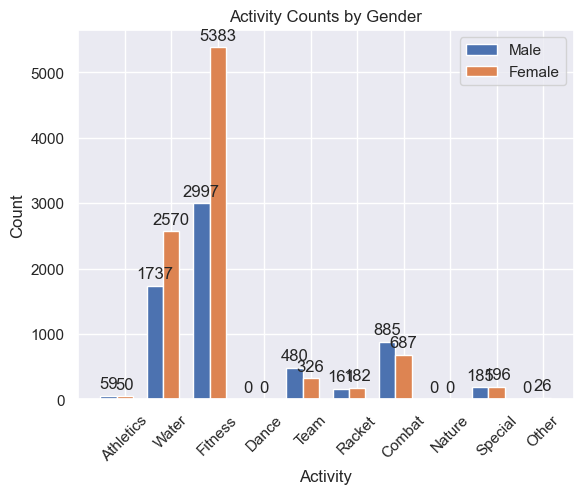

In [31]:
activity_counts = activities_gender.groupby('Gender_binary').sum()

# Define the activities and genders
activities = list(activity_counts.columns)
genders = ['Male', 'Female']  # You can replace these labels as needed


# Create a grouped bar chart
width = 0.35  # Width of each bar
x = range(len(activities))

fig, ax = plt.subplots()
for i, gender in enumerate(genders):
    bars = ax.bar(
        [pos + i * width for pos in x],
        activity_counts.loc[i],
        width,
        label=gender,
    )
    
    # Add labels above the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{int(height)}",  # Format the label as an integer
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Offset for the label position
            textcoords="offset points",
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
        )

# Add labels and title

plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Counts by Gender")
plt.xticks([pos + width for pos in x], activities)
ax.set_xticklabels(activities, rotation=45)


# Add a legend
ax.legend()

# Show the plot
plt.show()

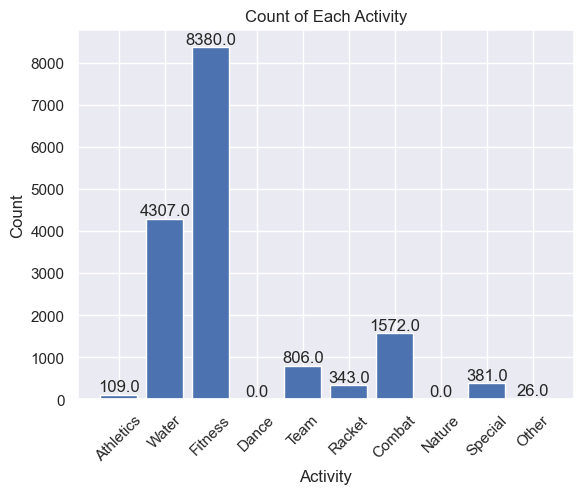

In [32]:
activities = data[['Athletics', 'Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature', 'Special', 'Other']]

# Calculate the count of each activity
activity_counts = activities.sum()

# Create a bar plot
plt.bar(activity_counts.index, activity_counts.values)

for i, count in enumerate(activity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Count of Each Activity")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [33]:
data.drop(['Dance','Nature'],axis=1, inplace=True)

In [34]:
activities = ['Athletics', 'Water', 'Fitness', 'Team', 'Racket', 'Combat', 'Special', 'Other']

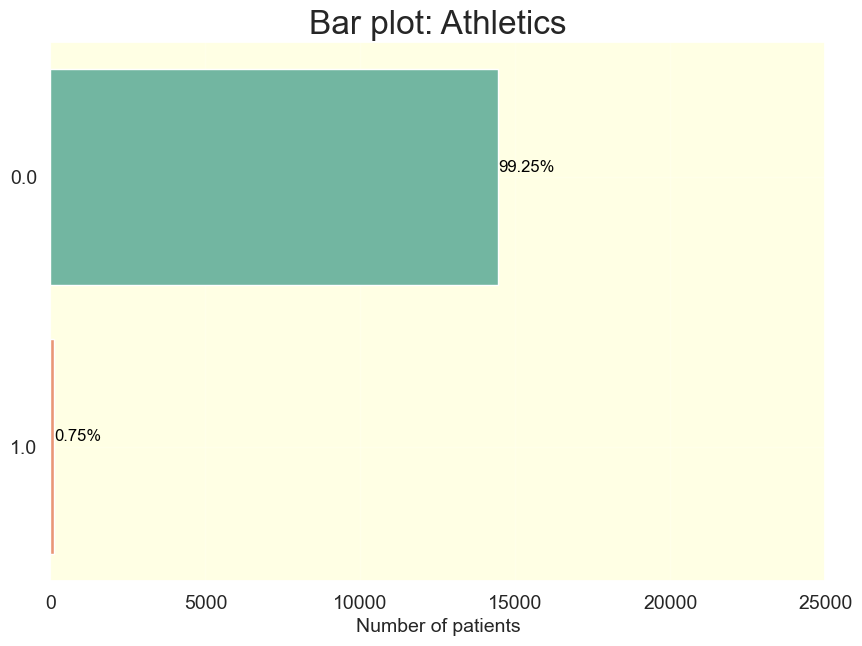

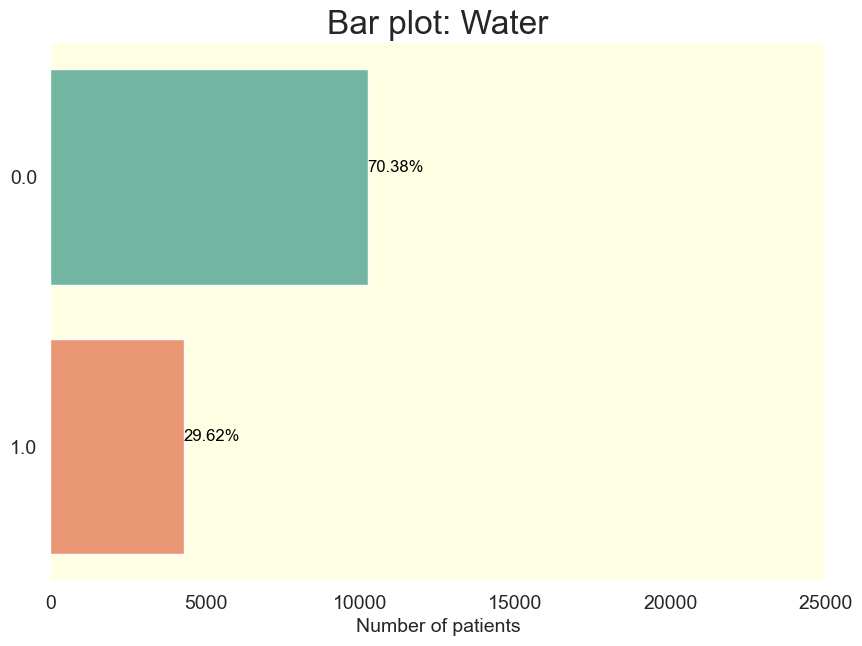

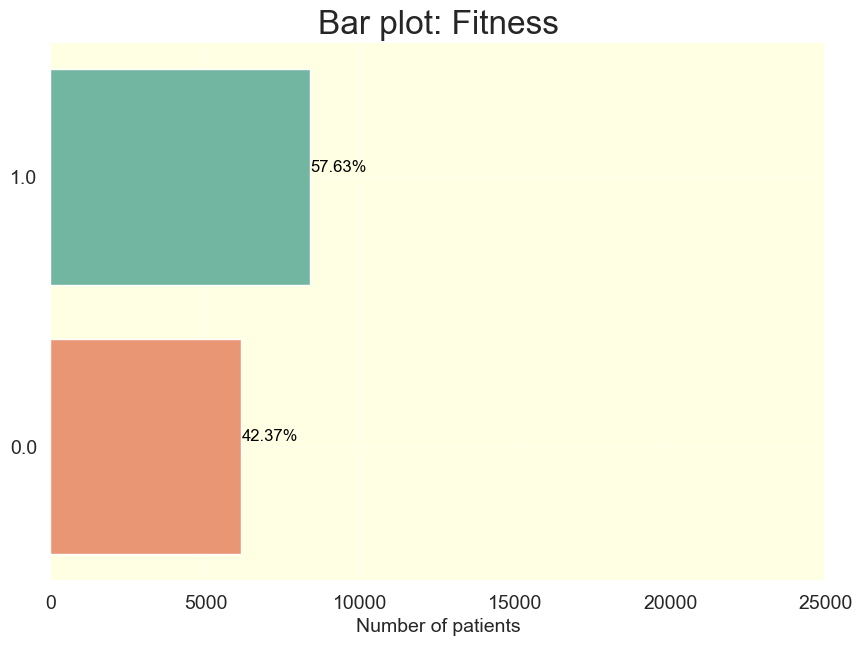

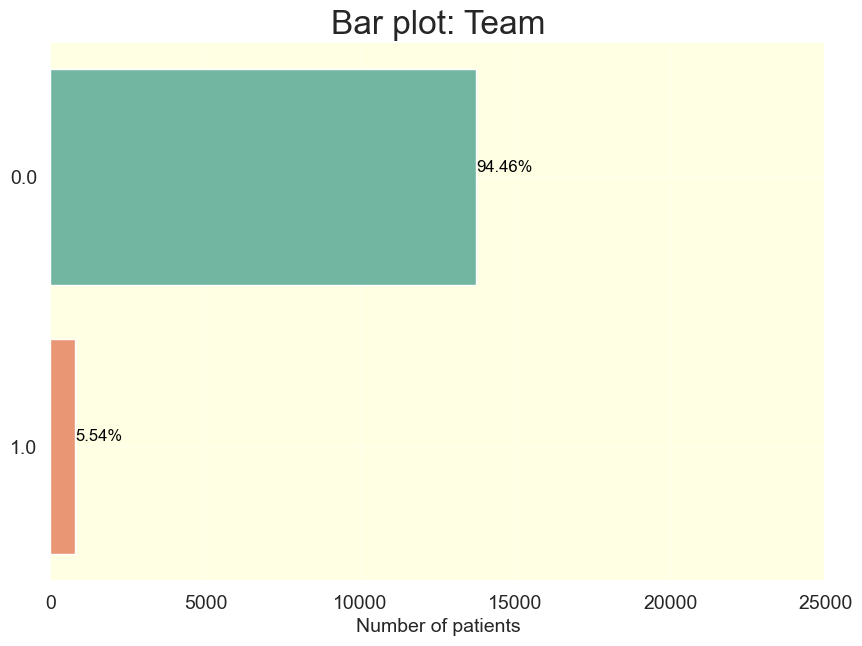

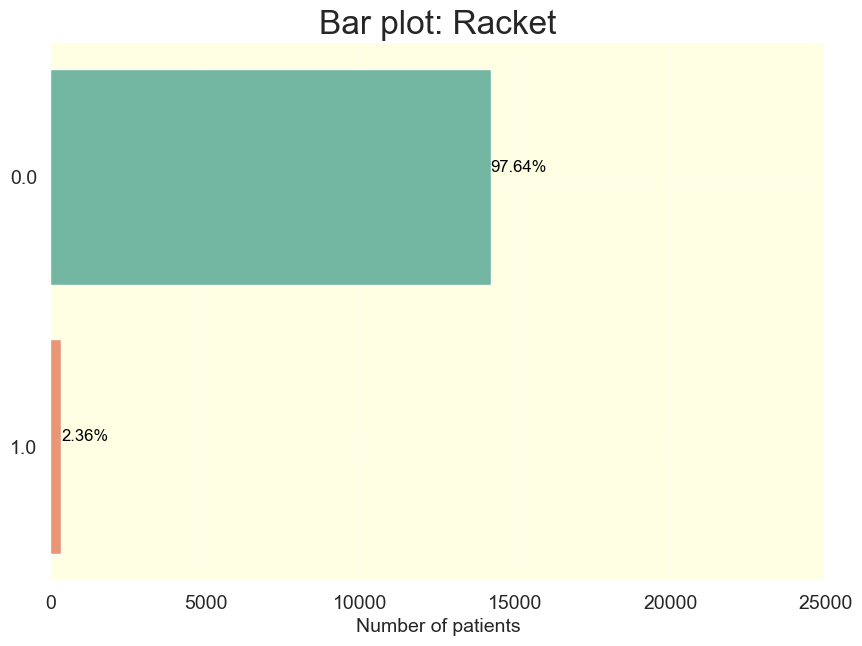

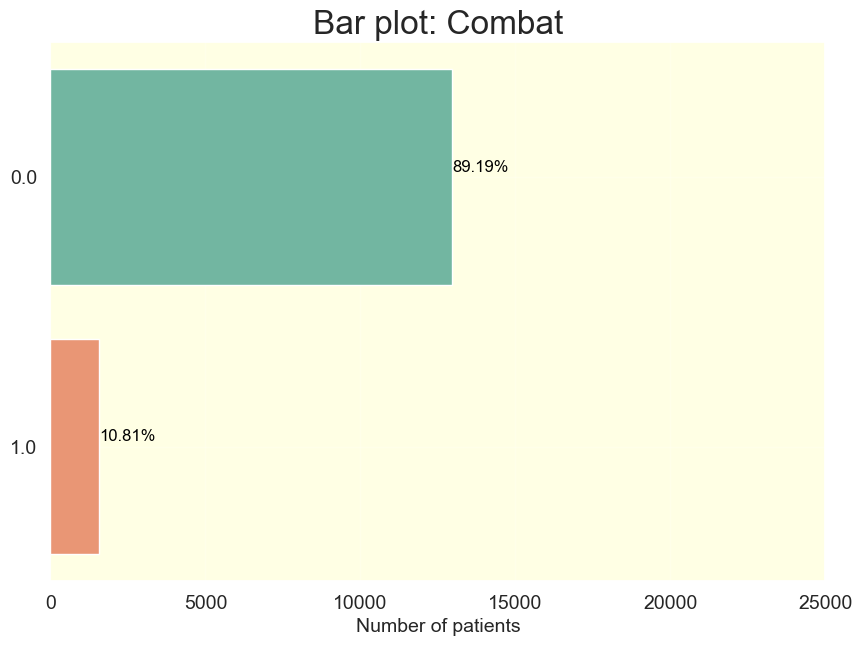

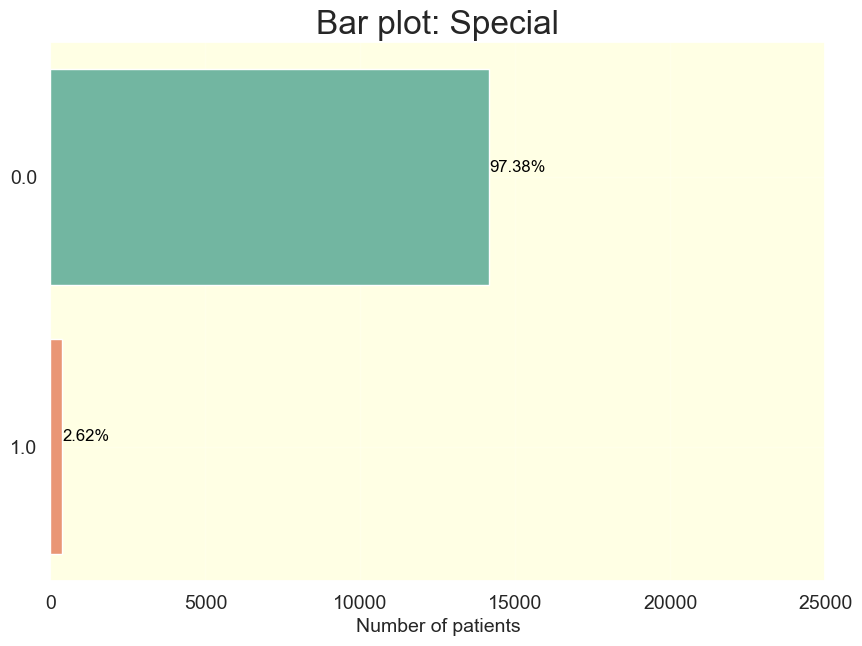

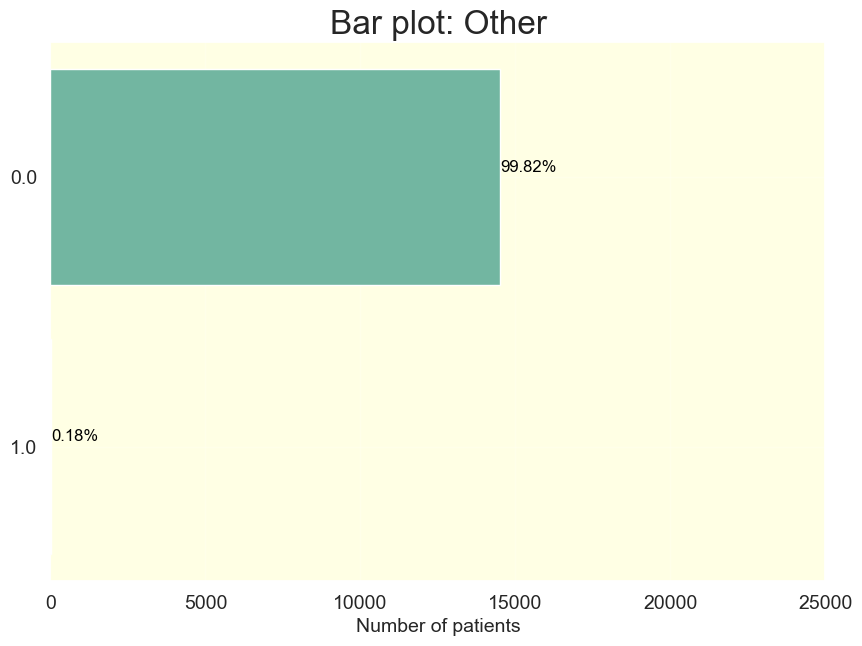

In [35]:
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(10, 7))
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette="Set2")
    ax.set_alpha(0.8)
    ax.set_title("Bar plot: {}".format(column), fontsize=24)
    ax.set_xlabel("Number of patients", fontsize=14)
    ax.set_ylabel("")
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(range(0, 30000, 5000))
    ax.set_facecolor('xkcd:off white')
    ax.grid(alpha=0.2)

    # Add percentages to individual bars
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)

    for i in ax.patches:
        ax.text(i.get_width() + .3, i.get_y() + .38, str(round((i.get_width() / total) * 100, 2)) + '%', fontsize=12,
                color='black')

    plt.show()
    print()

# Loop through columns and generate plots
for col in activities:
    plot_categorical_distribution(data, col)

In [36]:
data['EnrolmentPeriodFinishYear'] = data['EnrollmentFinish'].dt.year
data['EnrolmentPeriodYear'] = data['EnrollmentStart'].dt.year

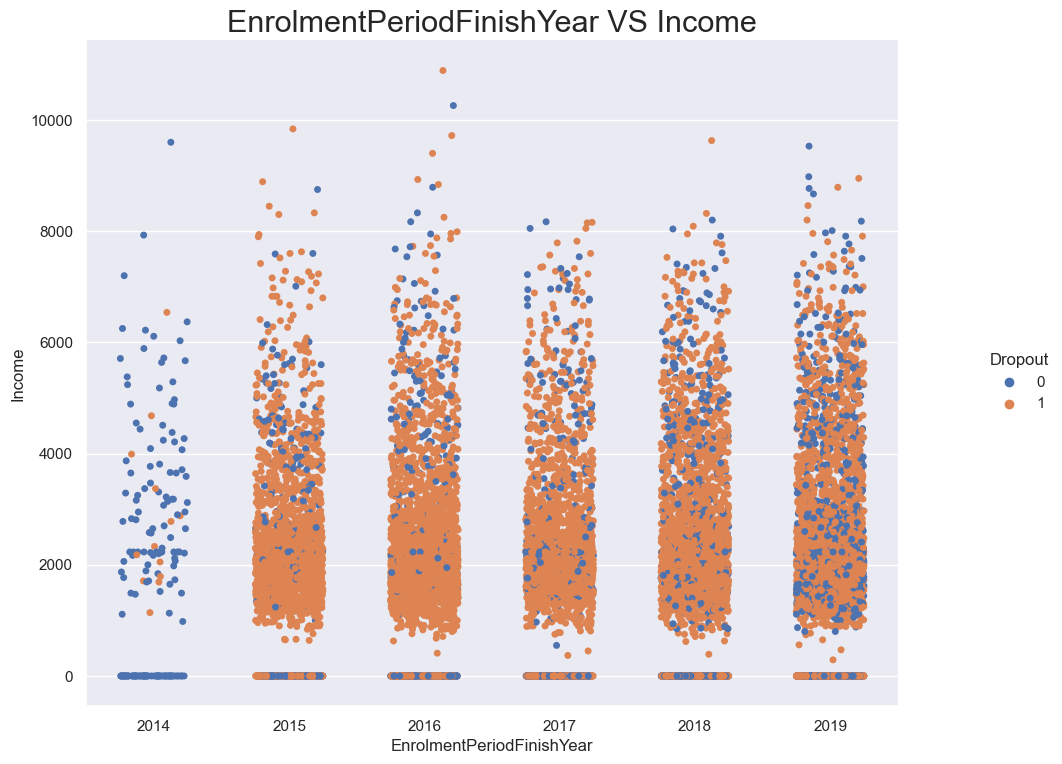

In [37]:
sns.catplot(x = "EnrolmentPeriodFinishYear", y = "Income", hue="Dropout", data=data, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("EnrolmentPeriodFinishYear VS Income", fontsize = 22)
plt.show()

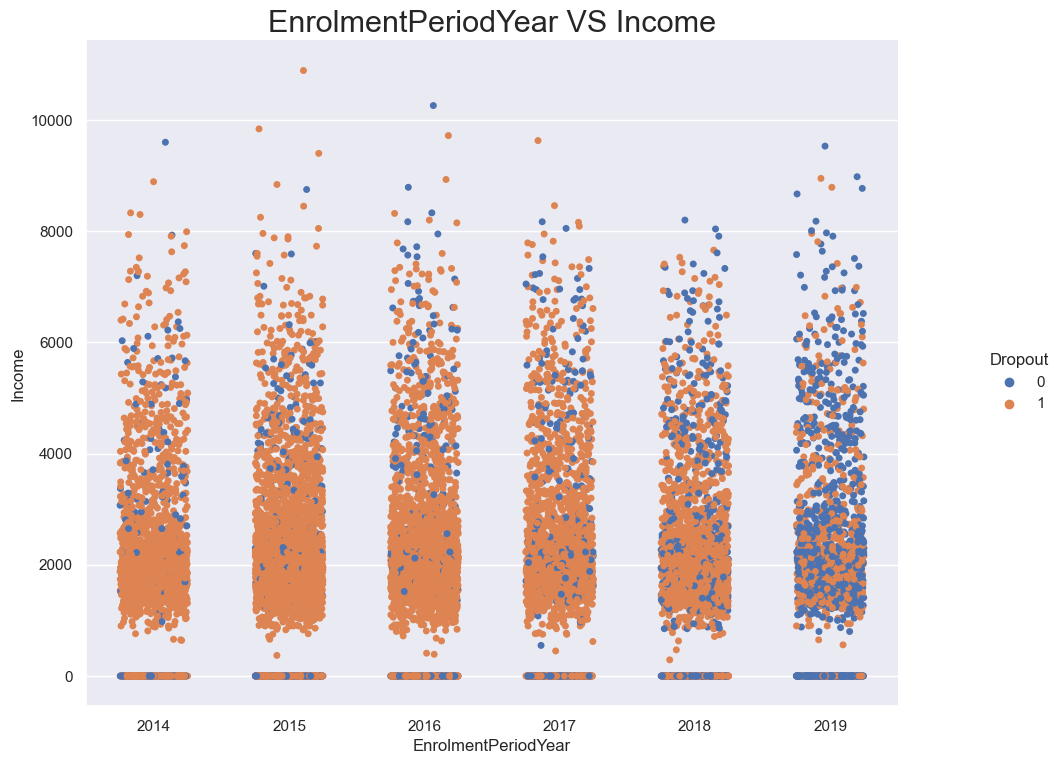

In [38]:
sns.catplot(x = "EnrolmentPeriodYear", y = "Income", hue="Dropout", data=data, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("EnrolmentPeriodYear VS Income", fontsize = 22)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


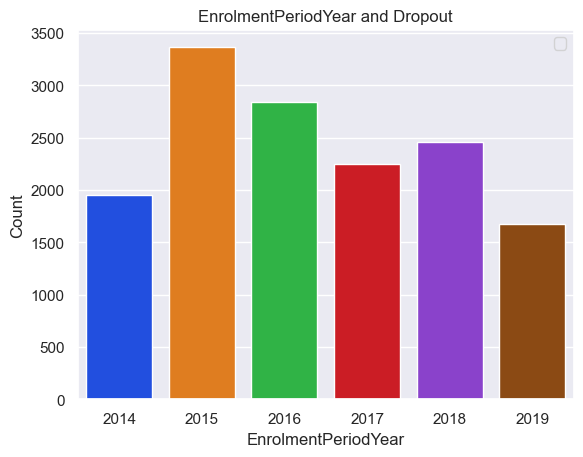

In [39]:
c =  sns.countplot(x = 'EnrolmentPeriodYear' , data = data, palette="bright" )
c.set(title='EnrolmentPeriodYear and Dropout')
c.set_ylabel('Count')
plt.legend(title = '')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


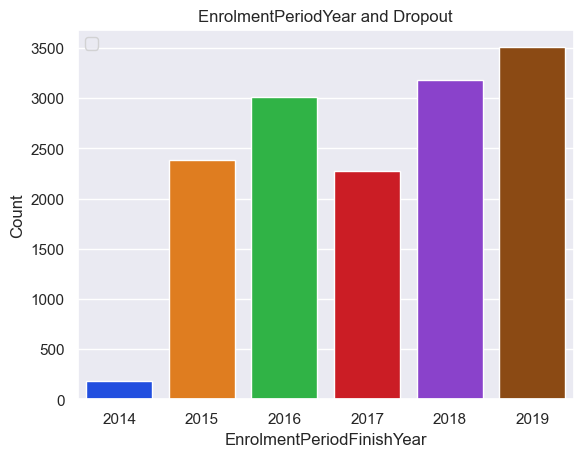

In [40]:
c =  sns.countplot(x = 'EnrolmentPeriodFinishYear', data = data, palette="bright" )
c.set(title='EnrolmentPeriodYear and Dropout')
c.set_ylabel('Count')
plt.legend(title = '')

In [41]:
def age_group(age):
    if age <= 10:
        return 'Child'
    elif 10 < age <= 18:
        return 'Teen'
    elif 18 < age <= 35:
        return 'Young adult'
    elif 35 < age <= 65:
        return 'Adult'
    else:
        return 'Elderly'

data['Age_group'] = data['Age'].apply(age_group)

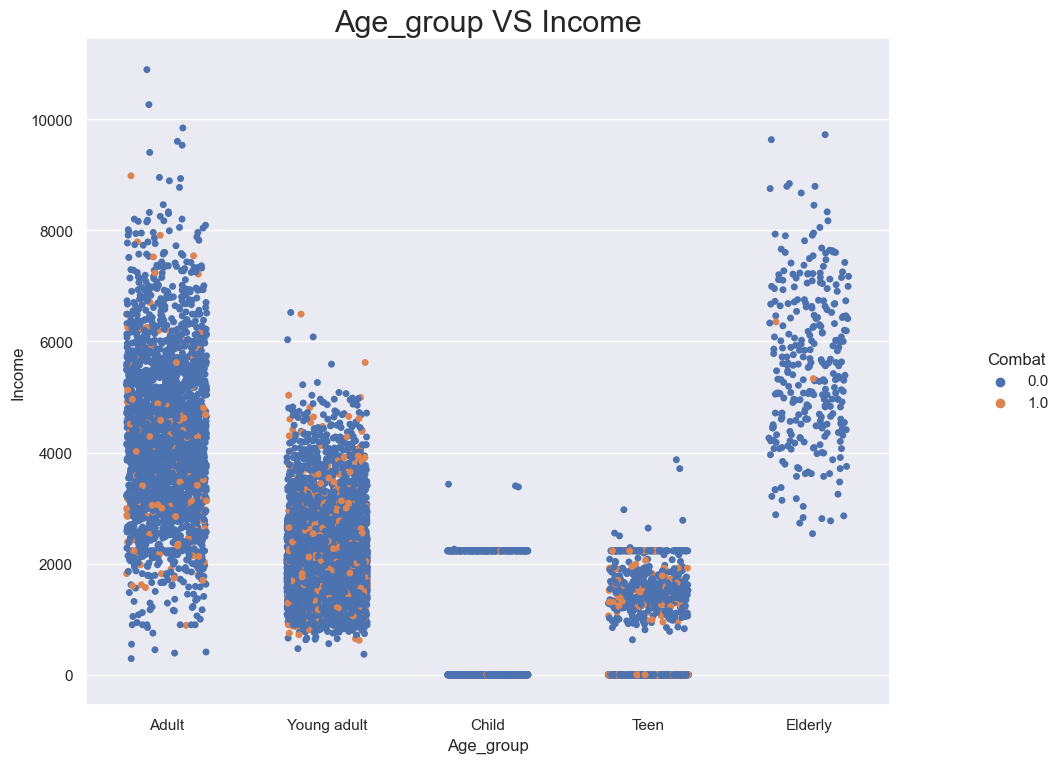

In [42]:
sns.catplot(x ='Age_group', y = "Income", hue= 'Combat', data=data, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("Age_group VS Income", fontsize = 22)
plt.show()

In [43]:
data.drop('Age_group', axis=1, inplace=True)

## Correlation matrix

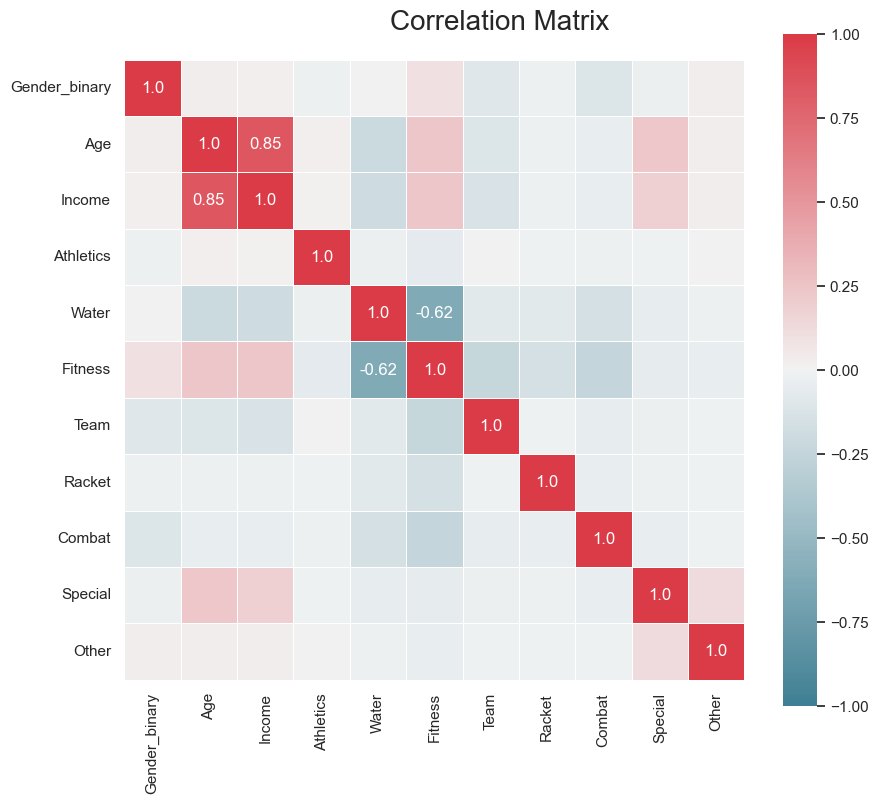

In [44]:
gender_age_activities = data[['Gender_binary','Age','Income','Athletics','Water', 'Fitness', 'Team', 'Racket', 'Combat','Special','Other']]

fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(gender_age_activities.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

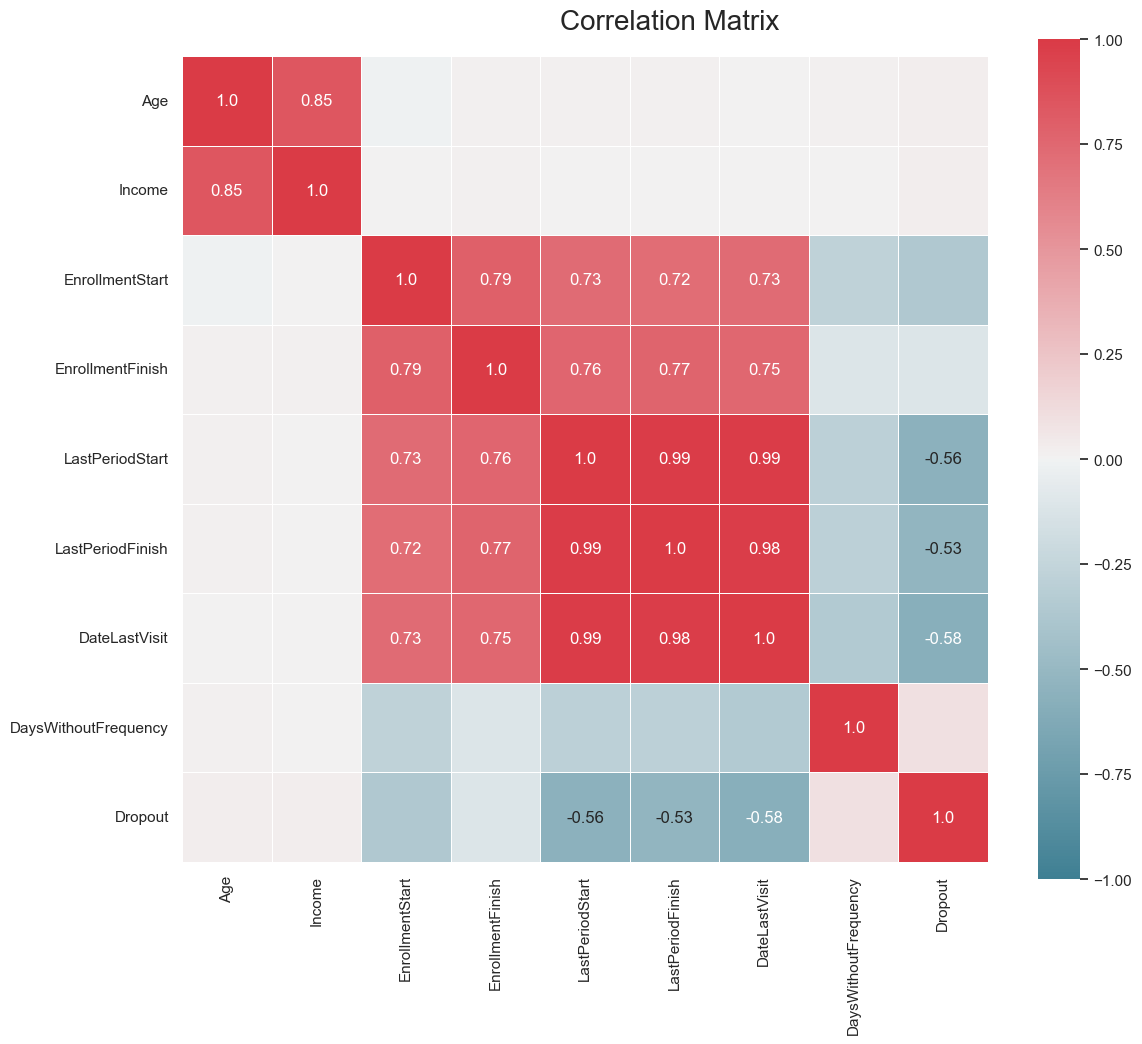

In [45]:
data_dates = data[['Age', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency','Dropout']]

fig = plt.figure(figsize=(13,10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data_dates.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [46]:
data.drop('LastPeriodFinish',axis=1,inplace=True)
data.drop('LastPeriodStart',axis=1,inplace=True)
data.drop('Income',axis=1,inplace=True)

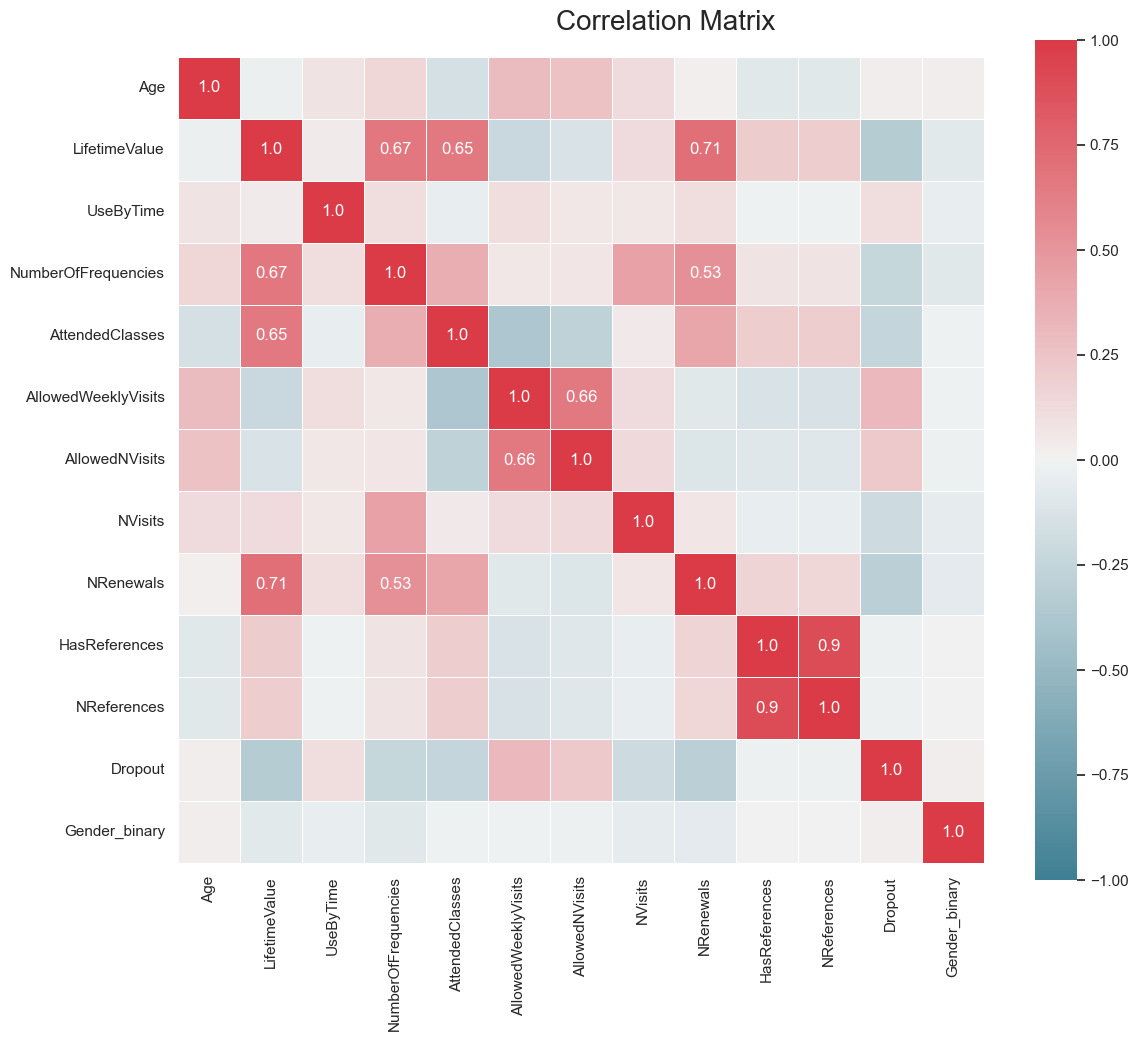

In [47]:
data1 = data[['Age', 'LifetimeValue', 'UseByTime', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisits', 'AllowedNVisits',
       'NVisits', 'NRenewals', 'HasReferences',
       'NReferences', 'Dropout',
       'Gender_binary']]

fig = plt.figure(figsize=(13,10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data1.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [48]:
data.drop('HasReferences',axis=1,inplace=True)

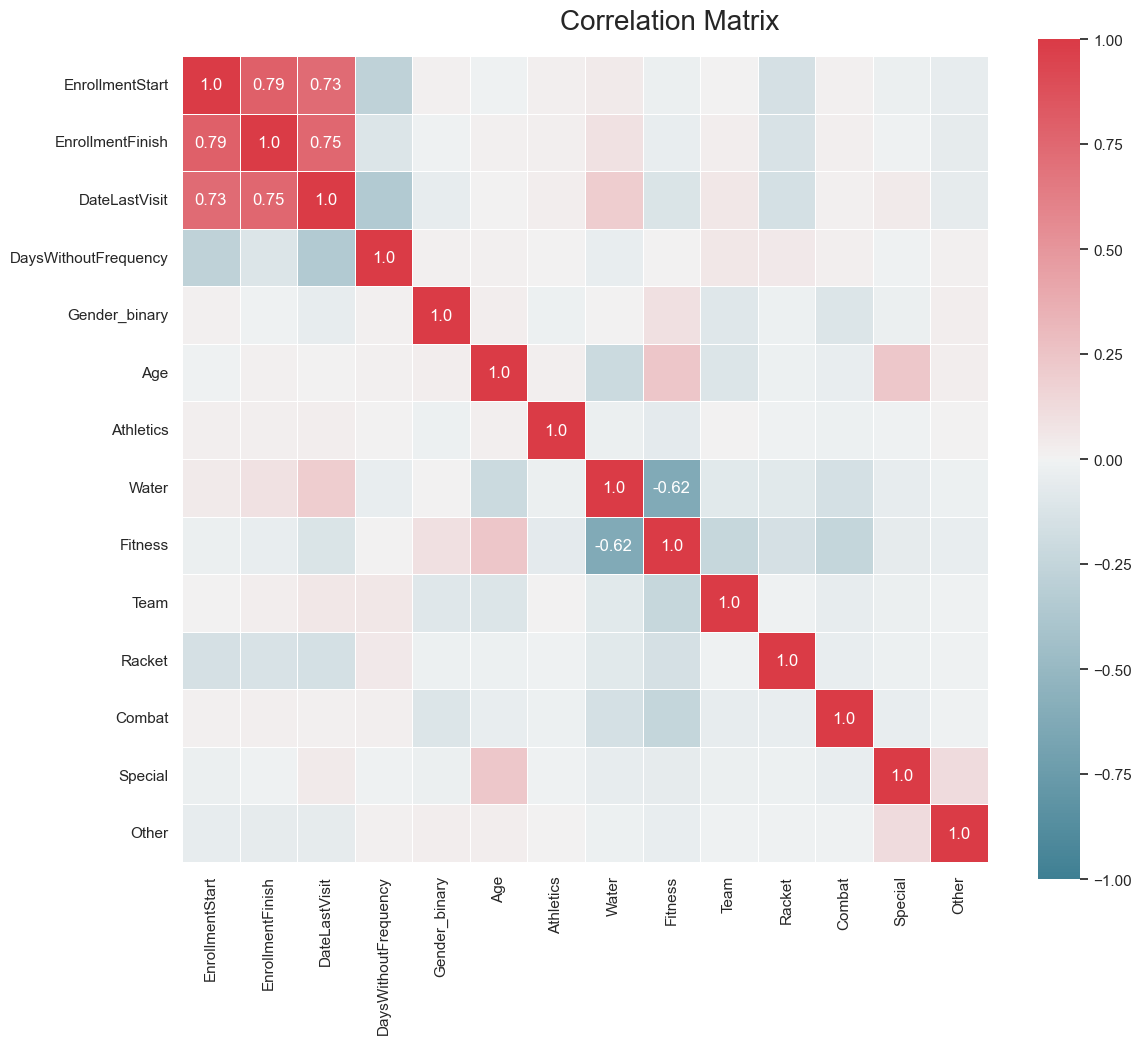

In [49]:
data_dates = data[['EnrollmentStart', 'EnrollmentFinish', 'DateLastVisit','DaysWithoutFrequency','Gender_binary','Age','Athletics','Water', 'Fitness', 'Team', 'Racket', 'Combat','Special','Other']]

fig = plt.figure(figsize=(13,10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data_dates.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [50]:
data.columns

Index(['Age', 'EnrollmentStart', 'EnrollmentFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime', 'Athletics',
       'Water', 'Fitness', 'Team', 'Racket', 'Combat', 'Special', 'Other',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisits',
       'AllowedNVisits', 'NVisits', 'NRenewals', 'NReferences', 'Dropout',
       'Gender_binary', 'EnrolmentPeriodFinishYear', 'EnrolmentPeriodYear'],
      dtype='object')

In [51]:
data['EnrollmentTime'] = data['EnrollmentFinish'] - data['EnrollmentStart']
data['EnrollmentTime'] = data['EnrollmentTime'].astype('str')
data['EnrollmentTime'] = data['EnrollmentTime'].str.replace('days','')
data['EnrollmentTime'] = data['EnrollmentTime'].astype('int')
data.drop(['EnrollmentFinish','EnrollmentStart','EnrolmentPeriodFinishYear','EnrolmentPeriodYear'],axis=1,inplace=True)
data.head()

,Age,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,Athletics,Water,Fitness,Team,Racket,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisits,AllowedNVisits,NVisits,NRenewals,NReferences,Dropout,Gender_binary,EnrollmentTime
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,...,9.0,7,0,6.28,2,0,0,0,1,58
10001,29,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,...,23.0,1,2,17.42,1,2,0,1,1,398
10002,23,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,...,6.0,0,7,30.03,6,0,0,1,0,30
10003,9,2019-01-21,22,155.40,0,0.0,0.0,0.0,1.0,0.0,...,20.0,2,2,17.72,3,0,0,1,0,160
10005,24,2016-07-28,3,140.00,0,0.0,0.0,1.0,0.0,0.0,...,28.0,0,7,59.01,26,0,0,1,1,243


In [52]:
from datetime import datetime
questionary_date = datetime(2019, 10, 31)

data['DaysSinceLastVisit'] = data['DateLastVisit'].apply(lambda x: (questionary_date - x).days)
data.drop('DateLastVisit',axis=1,inplace=True)

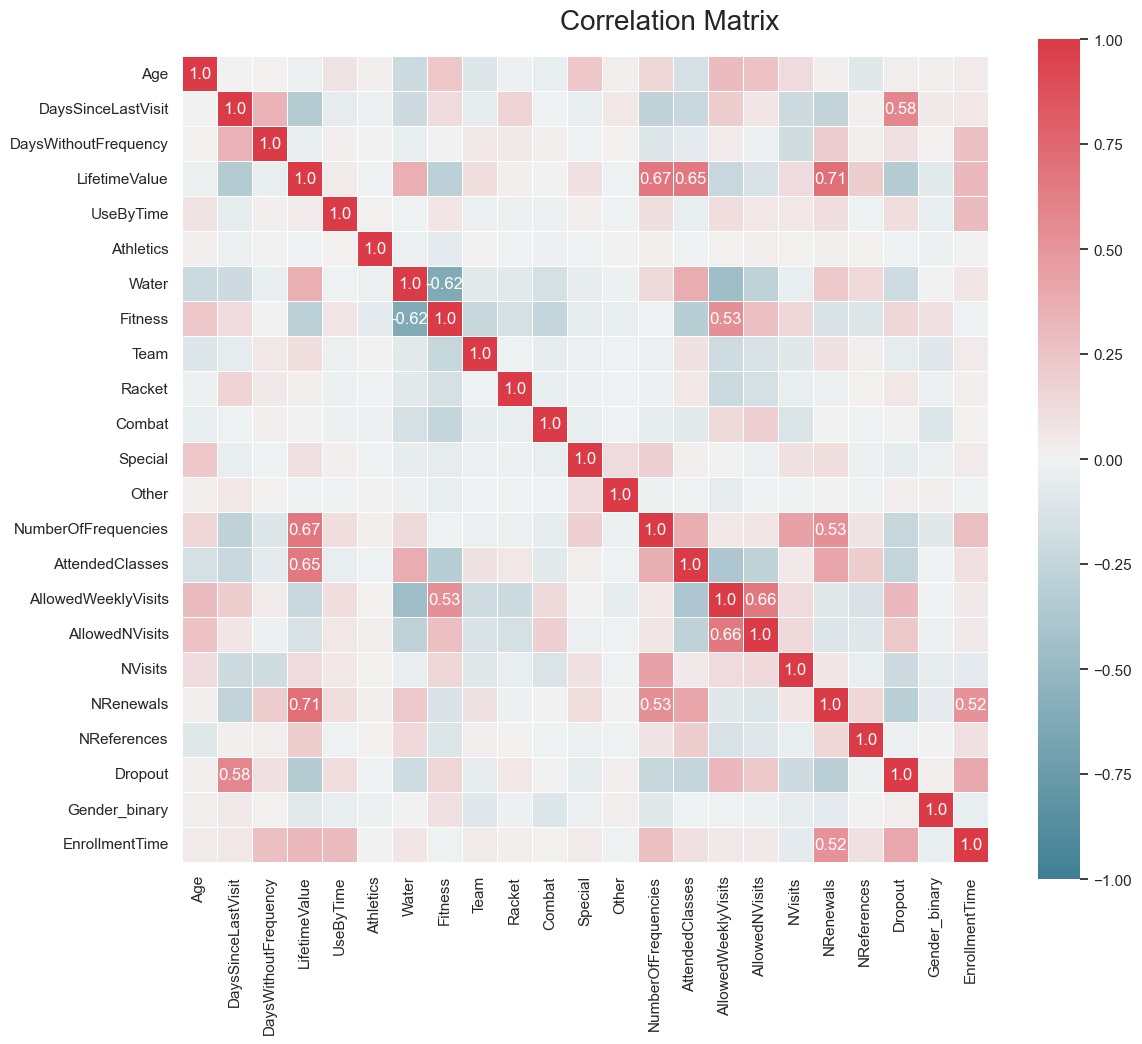

In [53]:
data_all_variables = data[['Age', 'DaysSinceLastVisit', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'Athletics', 'Water', 'Fitness', 'Team', 'Racket',
       'Combat', 'Special', 'Other', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisits', 'AllowedNVisits', 'NVisits', 'NRenewals',
       'NReferences', 'Dropout', 'Gender_binary', 'EnrollmentTime']]

fig = plt.figure(figsize=(13,10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data_all_variables.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [54]:
activities = data[['Athletics','Water', 'Fitness', 'Team', 'Racket', 'Combat','Special', 'Other']]
activities['TotalActivities'] = activities.sum(axis=1)
count_by_activity = activities.sum(axis=0)
count_by_activity.sort_values(ascending=False)

TotalActivities    15924.0
Fitness             8380.0
Water               4307.0
Combat              1572.0
Team                 806.0
Special              381.0
Racket               343.0
Athletics            109.0
Other                 26.0
dtype: float64

In [55]:
data['NActivities'] = activities['TotalActivities']

In [56]:
data['NActivities'].unique()

array([1., 2., 3., 4., 5.])

In [57]:
data['EnrollmentTime']

ID
10000      58
10001     398
10002      30
10003     160
10005     243
         ... 
24937       0
24938     261
24939      30
24940       0
24941    1166
Name: EnrollmentTime, Length: 14541, dtype: int64

In [58]:
data['AvgLifeTimeValue'] = round( data['LifetimeValue'] / (data['EnrollmentTime'] / 365), 2)
data['AvgLifeTimeValue'] = data['AvgLifeTimeValue'].replace(np.inf,0) #replacing the result where inf (infinity) appeared with 0
data['AvgLifeTimeValue']

ID
10000    562.29
10001    439.47
10002    457.47
10003    354.51
10005    210.29
          ...  
24937      0.00
24938    480.86
24939    530.47
24940      0.00
24941    287.87
Name: AvgLifeTimeValue, Length: 14541, dtype: float64

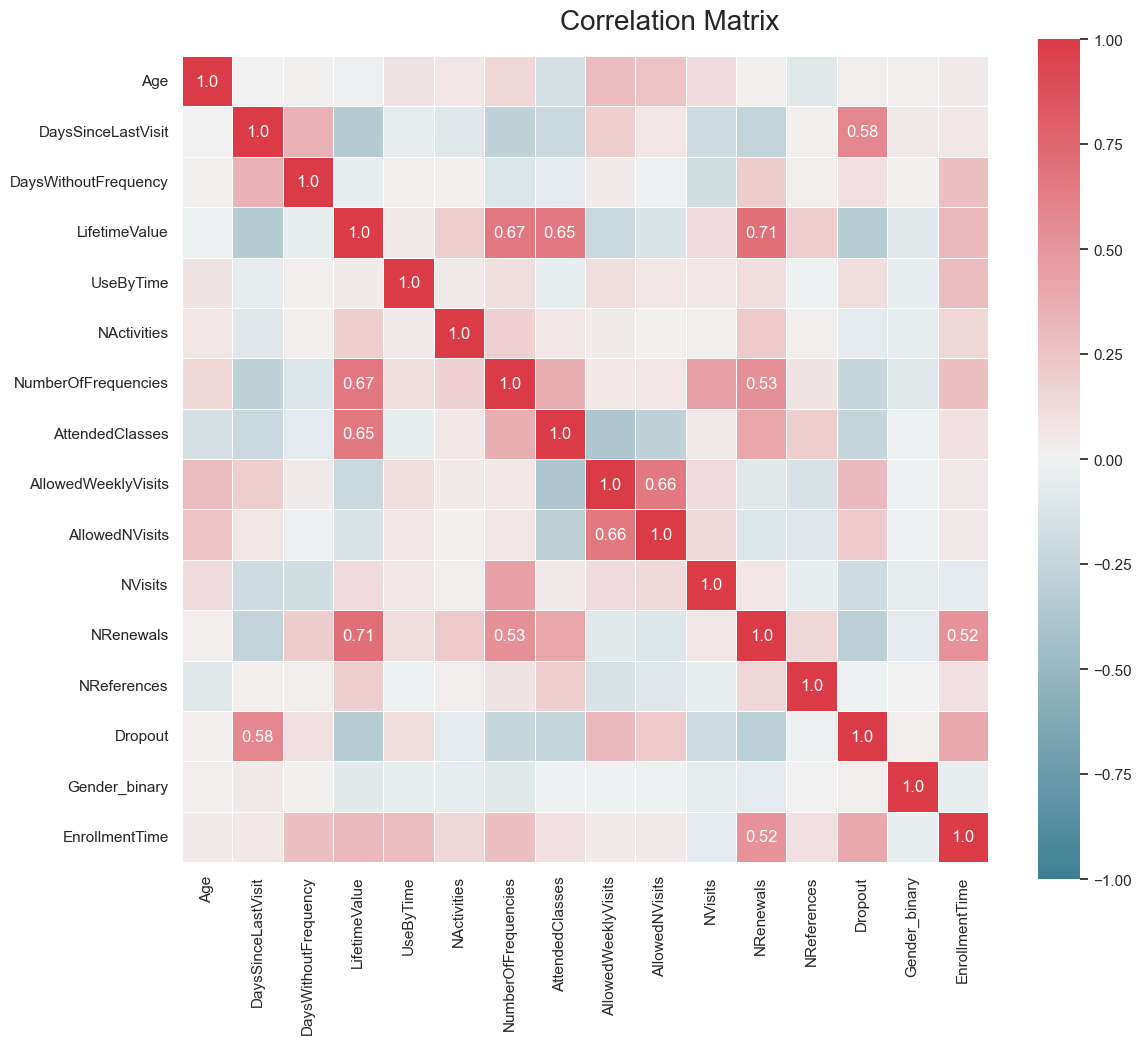

In [59]:
data_all_variables = data[['Age', 'DaysSinceLastVisit', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime','NActivities' , 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisits', 'AllowedNVisits', 'NVisits', 'NRenewals',
       'NReferences', 'Dropout', 'Gender_binary', 'EnrollmentTime']]

fig = plt.figure(figsize=(13,10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data_all_variables.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

Como não ha nenhuma variavel que tenha um valor de correlação negativo alto com a maioria das outras variáveis, não conseguimos retirar mais nenhuma feature com base na matrix de correlação 

In [60]:
data.columns

Index(['Age', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'Athletics', 'Water', 'Fitness', 'Team', 'Racket', 'Combat', 'Special',
       'Other', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisits', 'AllowedNVisits', 'NVisits', 'NRenewals',
       'NReferences', 'Dropout', 'Gender_binary', 'EnrollmentTime',
       'DaysSinceLastVisit', 'NActivities', 'AvgLifeTimeValue'],
      dtype='object')

In [61]:
data.head()

,Age,DaysWithoutFrequency,LifetimeValue,UseByTime,Athletics,Water,Fitness,Team,Racket,Combat,...,AllowedNVisits,NVisits,NRenewals,NReferences,Dropout,Gender_binary,EnrollmentTime,DaysSinceLastVisit,NActivities,AvgLifeTimeValue
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.28,2,0,0,0,1,58,1,1.0,562.29
10001,29,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.42,1,2,0,1,1,398,1568,1.0,439.47
10002,23,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,...,30.03,6,0,0,1,0,30,889,1.0,457.47
10003,9,22,155.40,0,0.0,0.0,0.0,1.0,0.0,0.0,...,17.72,3,0,0,1,0,160,283,1.0,354.51
10005,24,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,...,59.01,26,0,0,1,1,243,1190,1.0,210.29


In [62]:
non_metric_features=['UseByTime', 'Dropout','Gender_binary','Athletics', 'Water', 'Fitness', 'Team', 'Racket', 'Combat', 'Special','Other']


metric_features =  ['Age','DaysWithoutFrequency', 'LifetimeValue','NumberOfFrequencies', 'AttendedClasses',
                    'AllowedWeeklyVisits','AllowedNVisits', 'NVisits', 'NRenewals','NReferences','EnrollmentTime',
                    'DaysSinceLastVisit','NActivities','AvgLifeTimeValue']

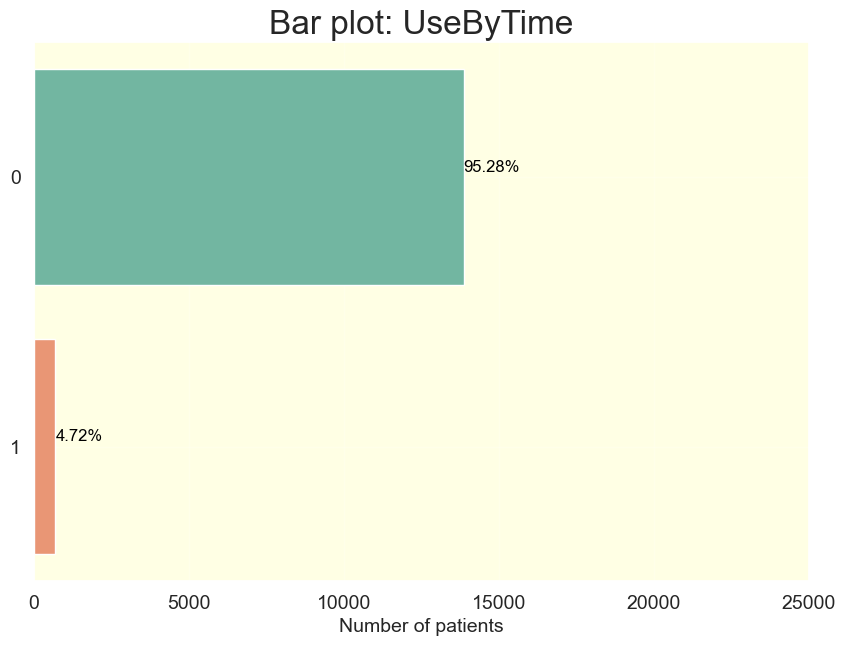

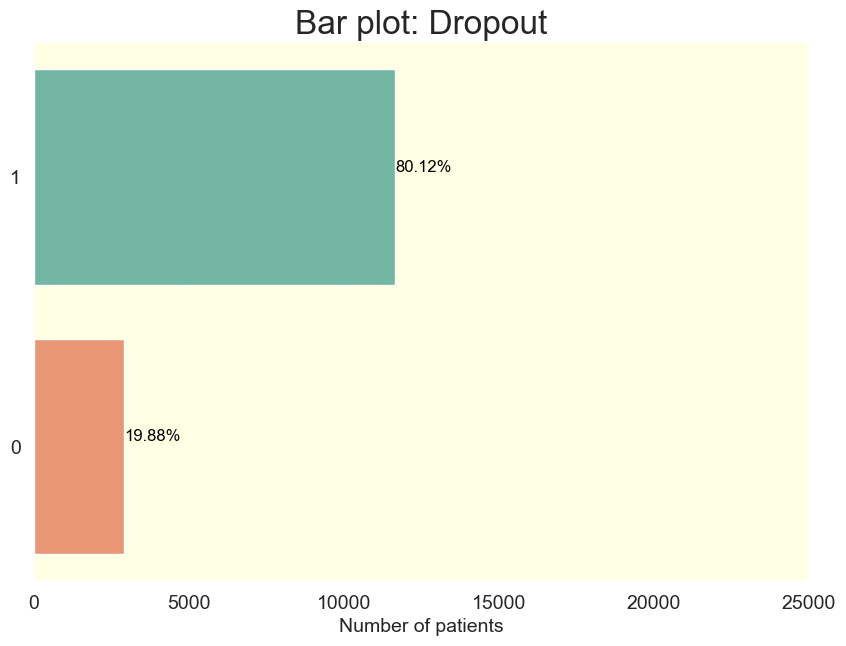

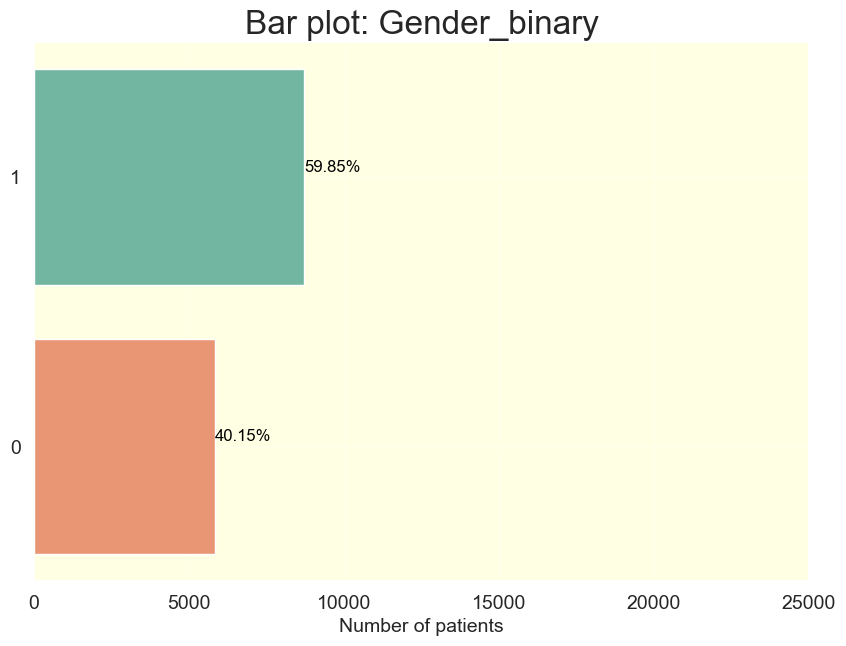

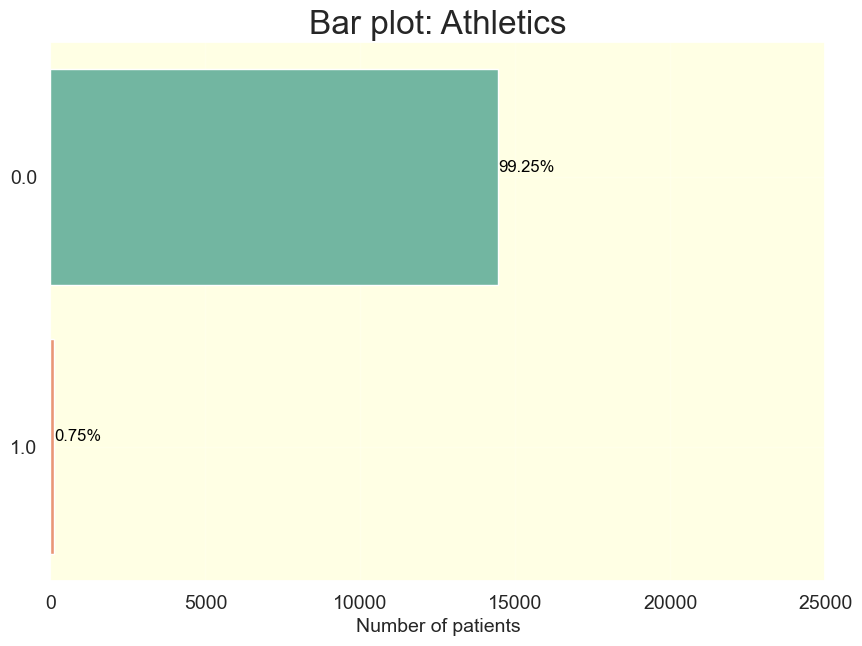

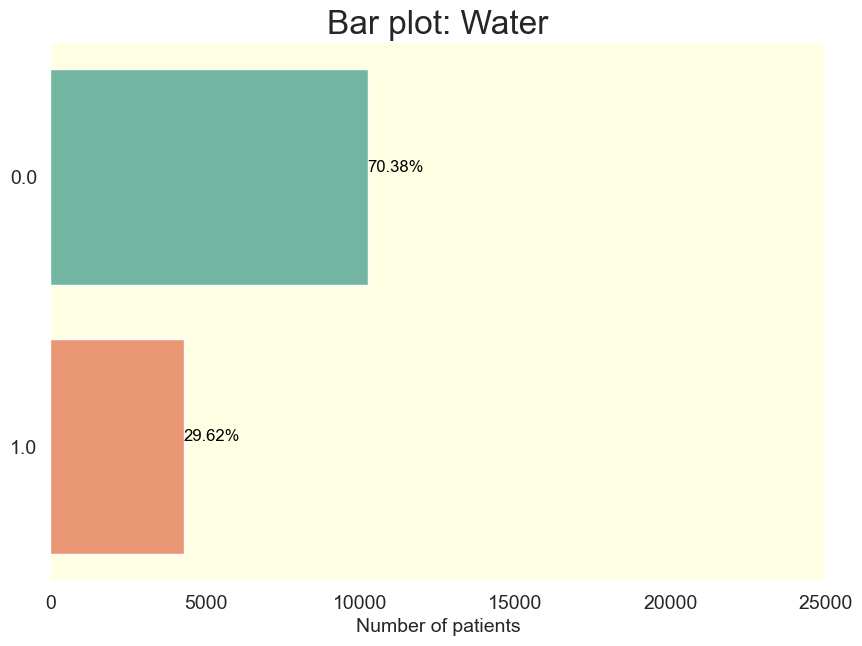

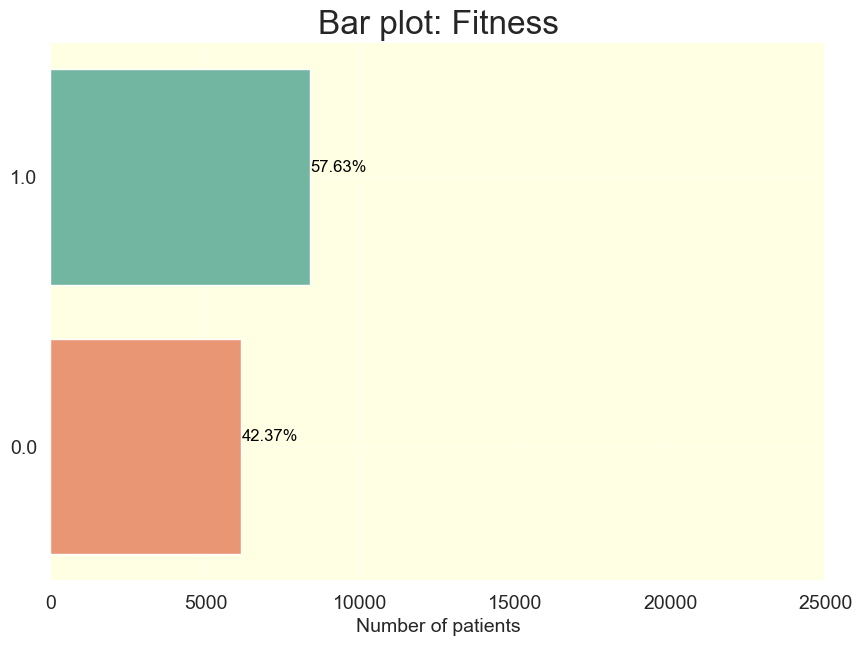

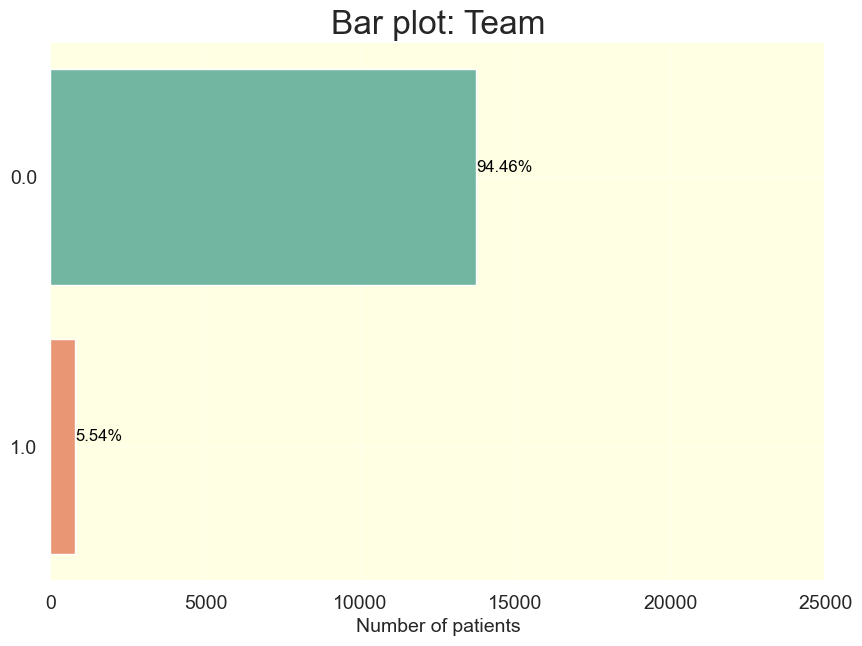

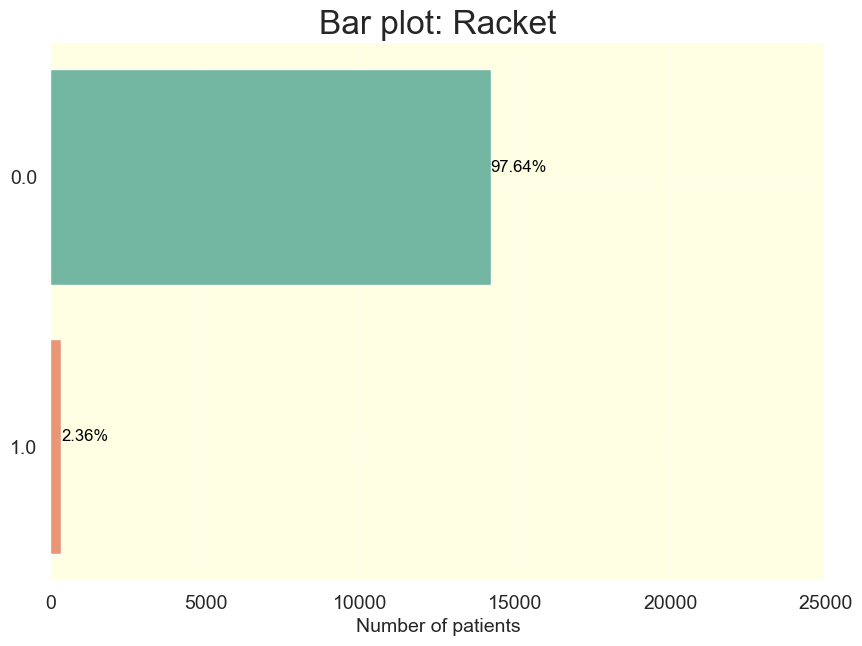

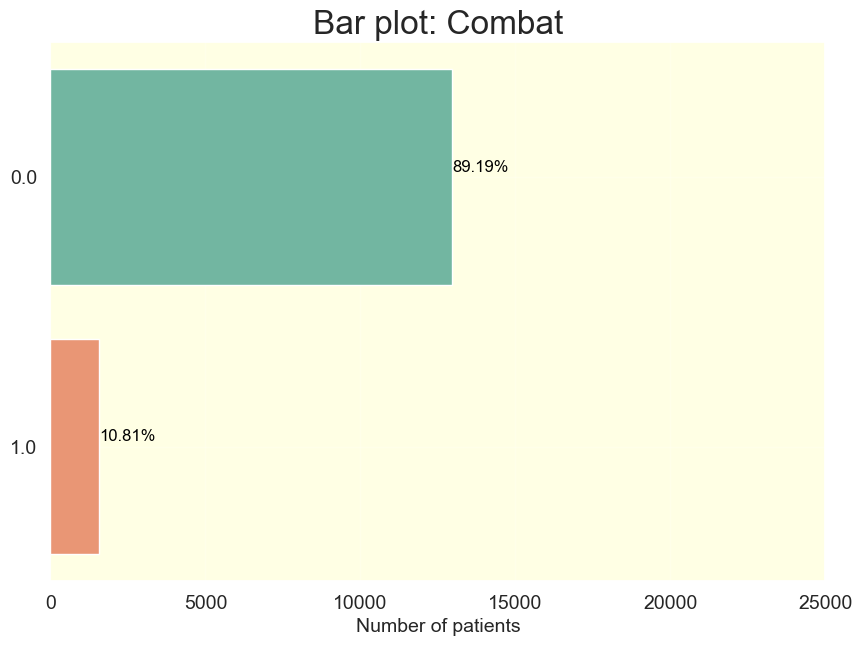

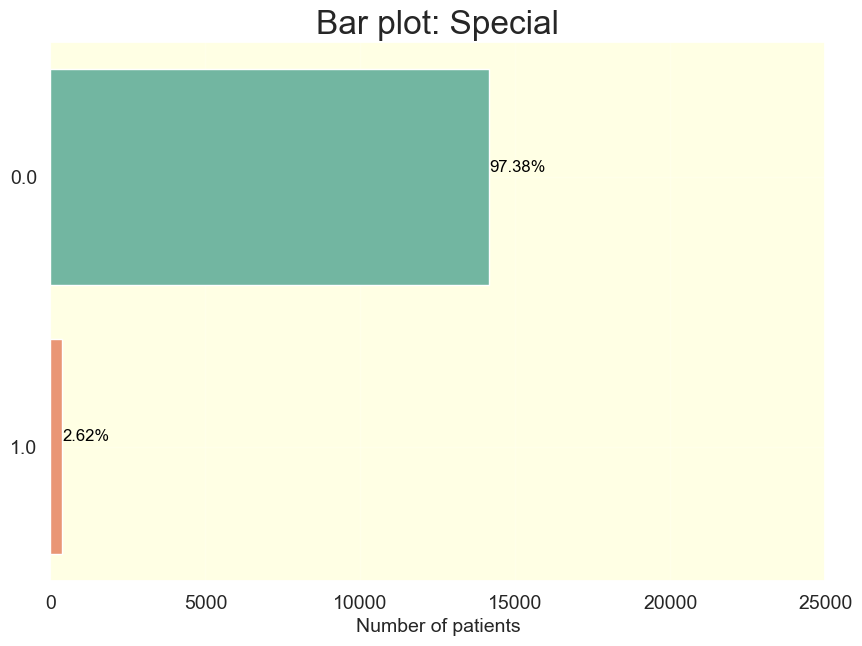

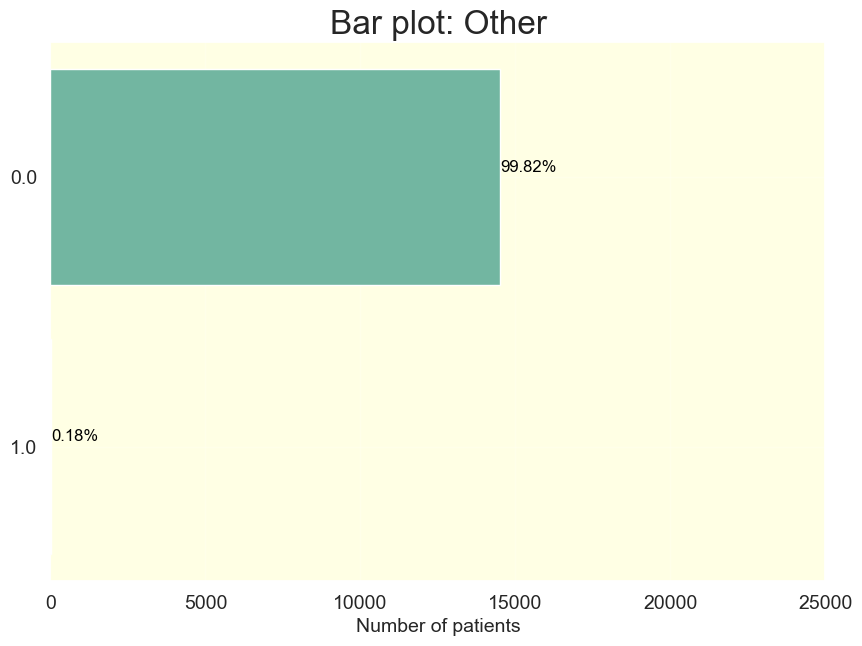

In [63]:
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(10, 7))
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette="Set2")
    ax.set_alpha(0.8)
    ax.set_title("Bar plot: {}".format(column), fontsize=24)
    ax.set_xlabel("Number of patients", fontsize=14)
    ax.set_ylabel("")
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(range(0, 30000, 5000))
    ax.set_facecolor('xkcd:off white')
    ax.grid(alpha=0.2)

    # Add percentages to individual bars
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)

    for i in ax.patches:
        ax.text(i.get_width() + .3, i.get_y() + .38, str(round((i.get_width() / total) * 100, 2)) + '%', fontsize=12,
                color='black')

    plt.show()
    print()

# Loop through columns and generate plots
for col in non_metric_features:
    plot_categorical_distribution(data, col)

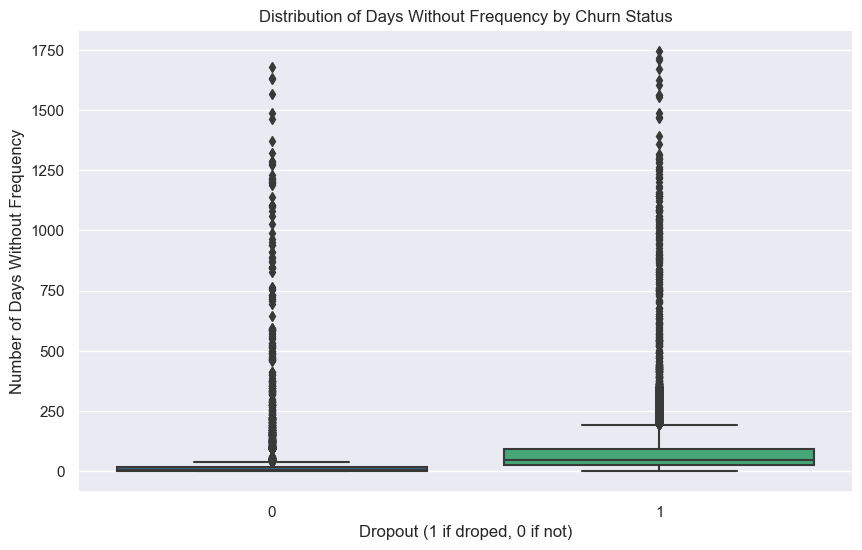

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dropout', y='DaysWithoutFrequency', data=data, palette='viridis')
plt.xlabel('Dropout (1 if droped, 0 if not)')
plt.ylabel('Number of Days Without Frequency')
plt.title('Distribution of Days Without Frequency by Churn Status')
plt.show()

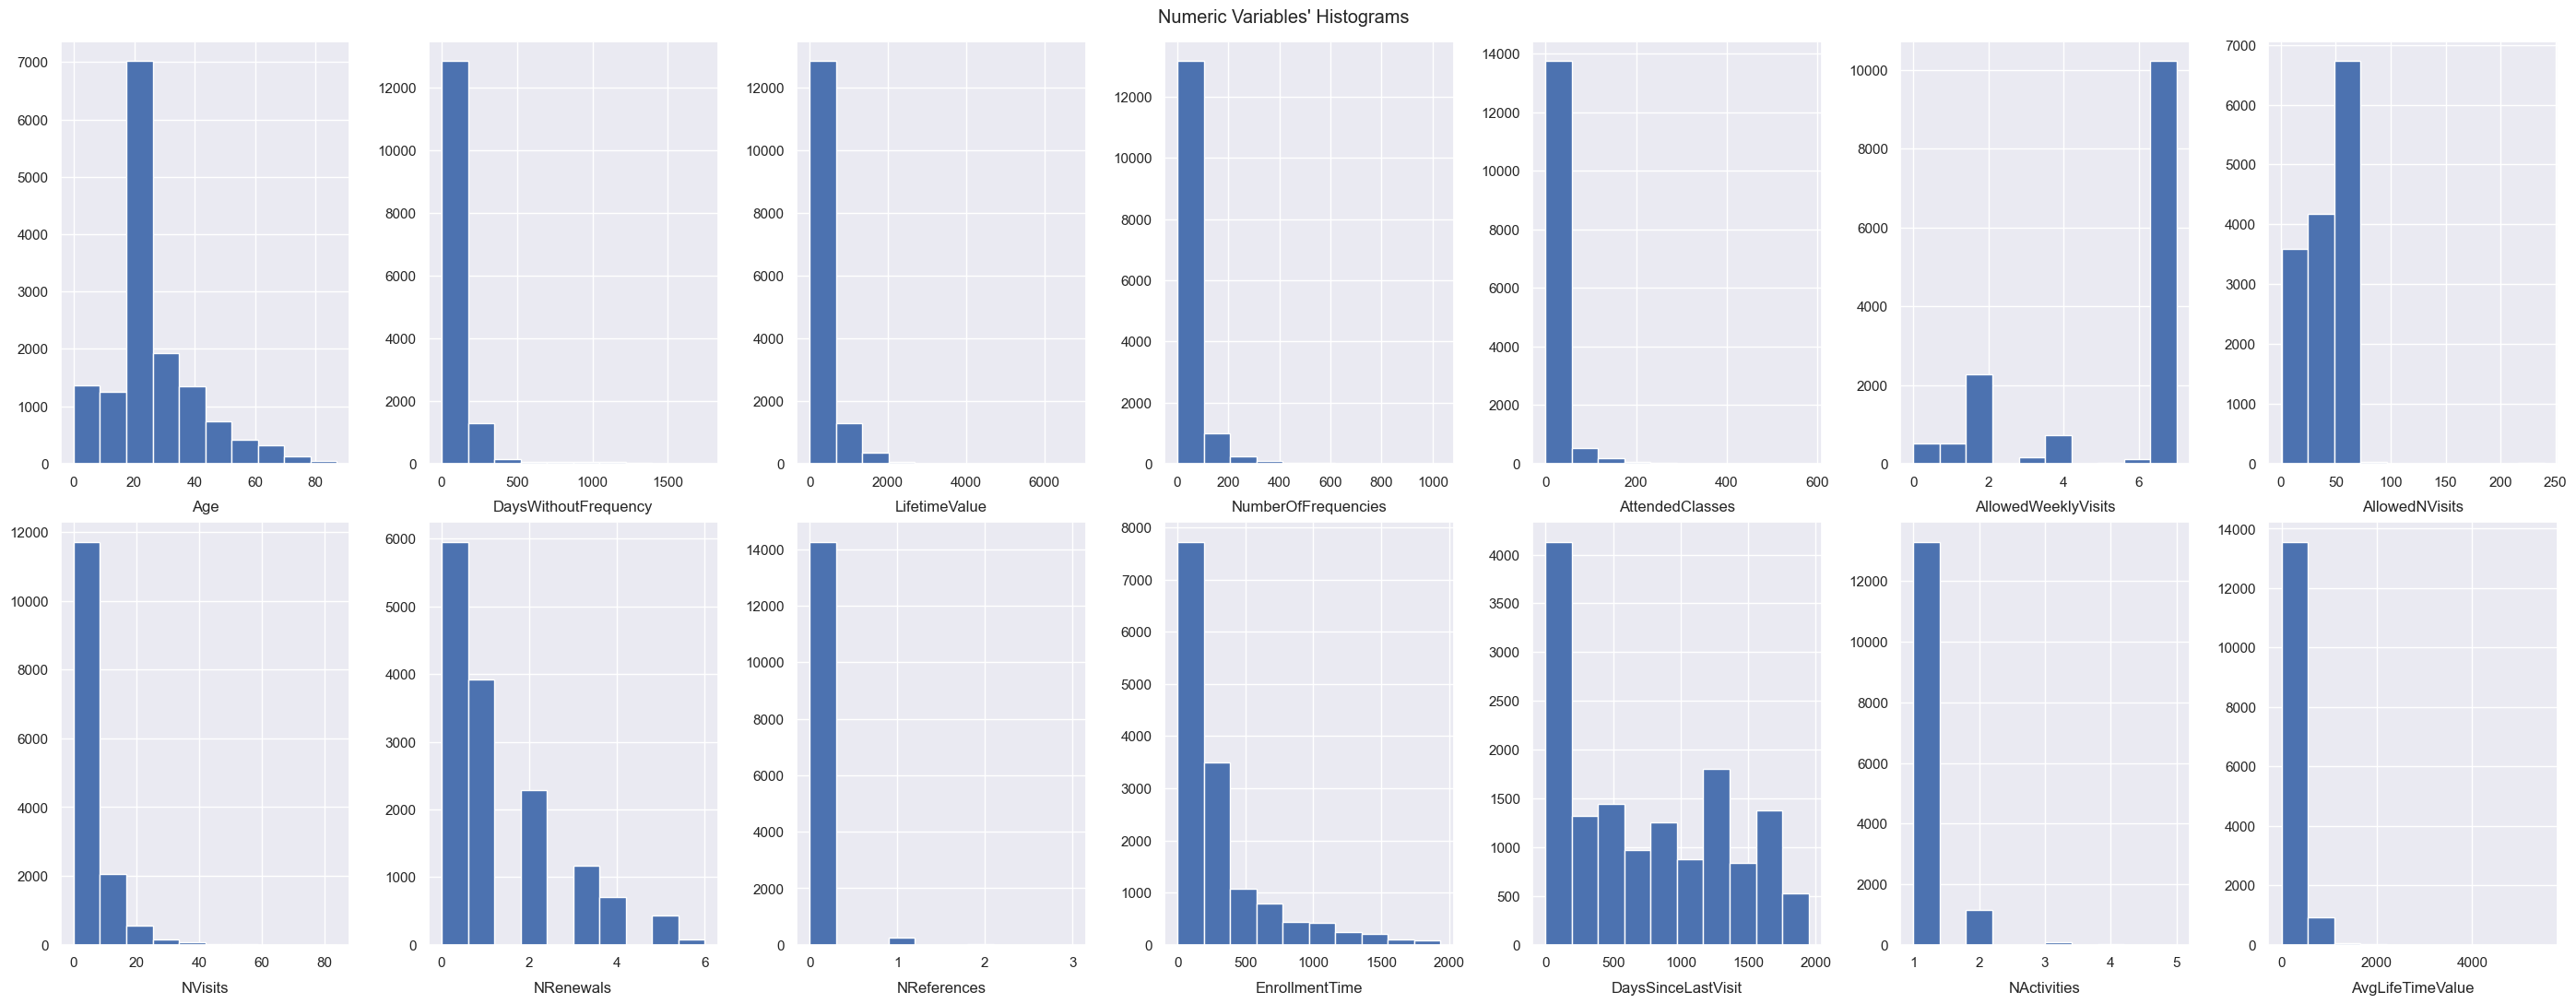

In [65]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(28, 11)) #give me some plots with 2 rows and the size 20, 11

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13) 
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.tight_layout()
plt.show()

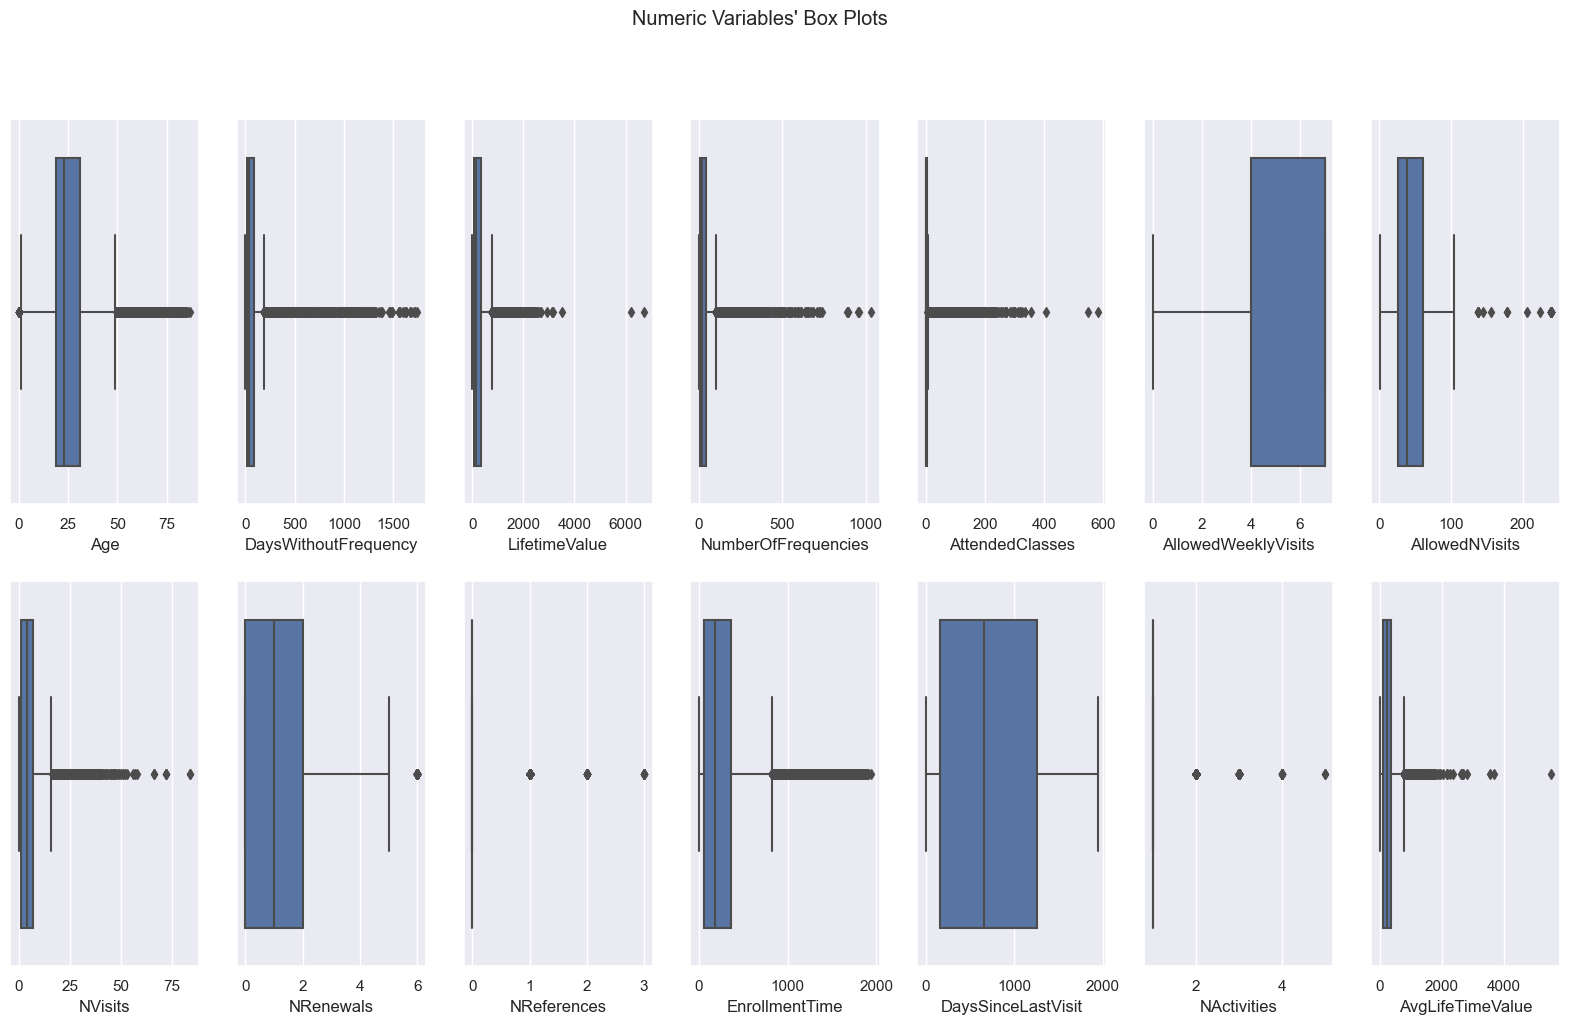

In [66]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

# Removing Outliers

In [67]:
#by hand based on the boxplots
filters1 = (
    (data['Age']<=80)
    &
    (data['DaysWithoutFrequency']<=1400)
    &
    (data['LifetimeValue']<=2500)
    &
    (data['NumberOfFrequencies']<=750)
    &
    (data['AttendedClasses']<=300)
    &
    (data['AllowedNVisits']<=100)
    &
    (data['NVisits']<=60)
    &
    (data['NRenewals']<6)
    &
    (data['EnrollmentTime']<1700)
    &
    (data['AvgLifeTimeValue']<=2300)
    &
    (data['NActivities']<=3)

)

df_1 = data[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9811


In [68]:
df_1.head()

,Age,DaysWithoutFrequency,LifetimeValue,UseByTime,Athletics,Water,Fitness,Team,Racket,Combat,...,AllowedNVisits,NVisits,NRenewals,NReferences,Dropout,Gender_binary,EnrollmentTime,DaysSinceLastVisit,NActivities,AvgLifeTimeValue
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.28,2,0,0,0,1,58,1,1.0,562.29
10001,29,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.42,1,2,0,1,1,398,1568,1.0,439.47
10002,23,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,...,30.03,6,0,0,1,0,30,889,1.0,457.47
10003,9,22,155.40,0,0.0,0.0,0.0,1.0,0.0,0.0,...,17.72,3,0,0,1,0,160,283,1.0,354.51
10005,24,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,...,59.01,26,0,0,1,1,243,1190,1.0,210.29


## Data Normalization

In [69]:
df_RobustScaler = df_1.copy()

In [70]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_feat = scaler.fit_transform(df_RobustScaler[metric_features])
scaled_feat

array([[ 3.08333333, -0.57142857, -0.28297178, ..., -0.62351869,
         0.        ,  1.16035292],
       [ 0.5       ,  0.27142857,  1.21386063, ...,  0.80492252,
         0.        ,  0.69923034],
       [ 0.        , -0.48571429, -0.48166635, ...,  0.18596171,
         0.        ,  0.76681059],
       ...,
       [-0.25      , -0.55714286, -0.4586293 , ...,  0.2379216 ,
         0.        ,  1.04088605],
       [ 2.66666667, -0.54285714,  2.40180457, ..., -0.62169553,
         0.        , -0.95074151],
       [ 0.75      , -0.38571429,  2.90478019, ..., -0.48222425,
         0.        ,  0.13005444]])

In [71]:
df_RobustScaler[metric_features] = scaled_feat
df_RobustScaler

,Age,DaysWithoutFrequency,LifetimeValue,UseByTime,Athletics,Water,Fitness,Team,Racket,Combat,...,AllowedNVisits,NVisits,NRenewals,NReferences,Dropout,Gender_binary,EnrollmentTime,DaysSinceLastVisit,NActivities,AvgLifeTimeValue
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,-0.571429,-0.282972,0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.929988,-0.333333,-0.5,0.0,0,1,-0.374172,-0.623519,0.0,1.160353
10001,0.500000,0.271429,1.213861,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.613263,-0.500000,0.5,0.0,1,1,0.751656,0.804923,0.0,0.699230
10002,0.000000,-0.485714,-0.481666,0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.254744,0.333333,-0.5,0.0,1,0,-0.466887,0.185962,0.0,0.766811
10003,-1.166667,-0.271429,-0.029372,0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.604734,-0.166667,-0.5,0.0,1,0,-0.036424,-0.366454,0.0,0.380252
10005,0.083333,-0.542857,-0.088501,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.569195,3.666667,-0.5,0.0,1,1,0.238411,0.460346,0.0,-0.161216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,-0.557143,4.981378,0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.117990,0.666667,1.0,0.0,0,0,-0.566225,-0.622607,0.0,-0.950742
24938,1.333333,-0.042857,0.694183,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.624920,-0.166667,-0.5,0.0,1,0,0.298013,0.544211,0.0,0.854627
24939,-0.250000,-0.557143,-0.458629,0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.254744,0.666667,-0.5,0.0,1,0,-0.466887,0.237922,0.0,1.040886


In [72]:
df_RobustScaler[metric_features].describe().round(2)

,Age,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisits,AllowedNVisits,NVisits,NRenewals,NReferences,EnrollmentTime,DaysSinceLastVisit,NActivities,AvgLifeTimeValue
count,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00,14266.00
mean,0.24,0.55,0.48,0.54,3.13,-0.48,0.07,0.21,0.07,0.02,0.37,0.05,0.09,0.03
std,1.16,1.90,1.27,1.58,8.66,0.78,0.55,1.02,0.65,0.16,1.10,0.54,0.31,0.79
min,-1.92,-0.59,-0.63,-0.46,0.00,-2.33,-1.09,-0.67,-0.50,0.00,-0.57,-0.62,0.00,-0.95
25%,-0.33,-0.40,-0.31,-0.30,0.00,-1.00,-0.38,-0.50,-0.50,0.00,-0.38,-0.48,0.00,-0.55
50%,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
75%,0.67,0.60,0.69,0.70,1.00,0.00,0.62,0.50,0.50,0.00,0.62,0.52,0.00,0.45
max,4.75,19.30,8.62,19.38,100.00,0.00,1.62,9.00,2.00,3.00,5.02,1.15,2.00,7.60


In [73]:
df_RobustScaler = pd.concat([df_RobustScaler[metric_features],df_RobustScaler[non_metric_features]], axis=1)
df_RobustScaler.head()

,Age,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisits,AllowedNVisits,NVisits,NRenewals,NReferences,...,Dropout,Gender_binary,Athletics,Water,Fitness,Team,Racket,Combat,Special,Other
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,-0.571429,-0.282972,-0.243243,2.333333,-2.333333,-0.929988,-0.333333,-0.5,0.0,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10001,0.500000,0.271429,1.213861,0.135135,0.333333,-1.666667,-0.613263,-0.500000,0.5,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10002,0.000000,-0.485714,-0.481666,-0.324324,0.000000,0.000000,-0.254744,0.333333,-0.5,0.0,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10003,-1.166667,-0.271429,-0.029372,0.054054,0.666667,-1.666667,-0.604734,-0.166667,-0.5,0.0,...,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10005,0.083333,-0.542857,-0.088501,0.270270,0.000000,0.000000,0.569195,3.666667,-0.5,0.0,...,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_RobustScaler.columns

Index(['Age', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisits', 'AllowedNVisits', 'NVisits',
       'NRenewals', 'NReferences', 'EnrollmentTime', 'DaysSinceLastVisit',
       'NActivities', 'AvgLifeTimeValue', 'UseByTime', 'Dropout',
       'Gender_binary', 'Athletics', 'Water', 'Fitness', 'Team', 'Racket',
       'Combat', 'Special', 'Other'],
      dtype='object')

In [75]:
df = df_RobustScaler.copy()

In [76]:
df.to_csv('data_preprocessed_RobustScaler_activities.csv', index=True)